 #  Default of credit card clients Data Set                              


![Python logo](https://miro.medium.com/max/613/1*3RXBGMNbW6a4PYVqYX97YQ.png)

##  Dataset Information

This dataset contains information on default payments, demographic factors, credit data, history of payment, and bill statements of credit card clients in Taiwan from April 2005 to September 2005.

## Source:

Name: I-Cheng Yeh
email addresses: (1) icyeh '@' chu.edu.tw (2) 140910 '@' mail.tku.edu.tw
institutions: (1) Department of Information Management, Chung Hua University, Taiwan. (2) Department of Civil Engineering, Tamkang University, Taiwan.
other contact information: 886-2-26215656 ext. 3181

The data is open for public use and no authorizations are required.The original dataset can be found here at the UCI Machine Learning Repository:
[https://archive.ics.uci.edu/ml/datasets/default+of+credit+card+clients](https://archive.ics.uci.edu/ml/datasets/default+of+credit+card+clients)

## Table of Contents

   1. [Attribute,Information](#1.-Attribute-Information)
   2. [Objectives](#2.-Objectives)
   3. [Data,Exploration](#3.-Data-Exploration)
   4. [Visualization](#4.-Visualization)
   5. [Distribution,of,Continuous,Variables](#5.-Distribution-of-Continuous-Variables)
   6. [Normalization](#6.-Normalization)
   7. [Log,Function](#7.-Log-Function)   
   8. [Box,plot,&,Violin,plot,of,Continuous,Variables](#8.-Box-plot-&-Violin-plot-of-Continuous-Variables)    
   9. [Visually,Verification,of,Variables,and,Output](#9.-Visually-Verification-of-Variables-and-Output)   
   10. [Pairplot](#10.-Pairplot)
   11. [Correlation,Matrix](#11.-Correlation-Matrix)
   12. [Categorical,Variables](#12.-Categorical-Variables)  
   13. [Data,Preprocessing](#13.-Data-Preprocessing)   
   14.  [Splitting,dataset](#14.-Splitting-dataset)  
   15. [Pipeline](#15.-Pipeline) 
   16. [Comparison,RandomForest,and,KNeighbors,Classifiers](#16.-Comparison-RandomForest-and-KNeighbors-Classifiers)  
   17. [Cross,Validation](#17.-Cross-Validation)
   18. [Hyperparameter](#18.-Hyperparameter)
   19. [Fitting,Models,and,Scoring,by,ROC,and,Confusion,Matrix](#19.-Fitting-Models-and-Scoring-by-ROC-and-Confusion-Matrix)
   20. [Detecting,Optimum,Threshold](#20.-Detecting-Optimum-Threshold)  
   21. [Other,Classifiers](#21.-Other-Classifiers) 
   22. [Single,Models](#22.-Single-Models)
   23. [Decision,Tree](#23.-Decision-Tree)
   24. [Logistic,Regression](24-Logistic-Regression)
   25. [SVC](#25.-SVC)
   26. [Fitting,and,Comparison,Single,Classifiers](#26.-Fitting-and-Comparison-Single-Classifiers)
   27. [Ensemble,Methods](#27.-Ensemble-Methods)          
   28. [Random,Forest](#28.-Random-Forest)
   29. [AdaBoost](#29.-AdaBoost)        
   30. [Extra,Trees](#30.-Extra-Trees)
   31. [GradientBoosted,Trees](#31.-GradientBoosted-Trees)            
   32. [Fitting,and,Comparison,Ensemble,Classifiers](#32.-Fitting-and-Comparison-Ensemble-Classifiers)
   33. [Dimensionality,Reduction](#33.-Dimensionality-Reduction)            
   34. [Learning,Single,Models,by,PCA](#34.-Learning-Single-Models-by-PCA)
   35. [Learning,Ensemble,Models,by,PCA](#35.-Learning-Ensemble-Models-by-PCA)         
   36. [Learning,Curve](#36.-Learning-Curve)         
      
            
         
         
           
            
            
                
        
        
        
        
        
    
    
       
        
    
    
    
   
   
    
      
  
           

## 1. Attribute Information


This research employed a binary variable, default payment (Yes = 1, No = 0), as the response following 23 variables:

LIMIT_BAL: Amount of given credit in NT dollars (includes individual and family/supplementary credit

SEX: Gender (1=male, 2=female)

EDUCATION: (1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown)

MARRIAGE: Marital status (1=married, 2=single, 3=others)

AGE: Age in years

PAY_0  to PAY_6 :History of past payment(from April to September, 2005) as follows: PAY_0 = the repayment status in September, 2005; PAY_2 = the repayment status in August, 2005; . . .;PAY_6 = the repayment status in April, 2005. The measurement scale for the repayment status is: -1 = pay duly; 1 = payment delay for one month; 2 = payment delay for two months; . . .; 8 = payment delay for eight months; 9 = payment delay for nine months and above.

BILL_AMT1 to BILL_AMT6: Amount of bill statement (NT dollar). BILL_AMT1 = amount of bill statement in September, 2005; BILL_AMT2 = amount of bill statement in August, 2005; . . .; BILLAMT6 = amount of bill statement in April, 2005.

PAY_AMT1 to PAY_AMT6: Amount of previous payment (NT dollar). PAY_AMT1 = amount paid in September, 2005; PAY_AMT2 = amount paid in August, 2005; . . .;PAY_AMT6 = amount paid in April, 2005.

default payment next month :Default payment (1=yes, 0=no)

## 2. Objectives

1. How does the probability of default payment vary by categories of different demographic variables?
2. Which variables are the strongest predictors of default payment?
3. Which classification models can I use ?
4. How can I improve the performance of models?
5.Which models have better performance?



## 3. Data Exploration

In [5]:
#Import required libraries

import numpy as np
import pandas as pd
np.random.seed(123)
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12
import seaborn as sns
import seaborn as sns
sns.set_style("whitegrid")

  At first I took a look at data to see how values are.

In [6]:

data_o=pd.read_excel("default of credit card clients.xls",header=1,inplace=True)
data_o

ID  LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_0  PAY_2  PAY_3  \
0          1      20000    2          2         1   24      2      2     -1   
1          2     120000    2          2         2   26     -1      2      0   
2          3      90000    2          2         2   34      0      0      0   
3          4      50000    2          2         1   37      0      0      0   
4          5      50000    1          2         1   57     -1      0     -1   
...      ...        ...  ...        ...       ...  ...    ...    ...    ...   
29995  29996     220000    1          3         1   39      0      0      0   
29996  29997     150000    1          3         2   43     -1     -1     -1   
29997  29998      30000    1          2         2   37      4      3      2   
29998  29999      80000    1          3         1   41      1     -1      0   
29999  30000      50000    1          2         1   46      0      0      0   

       PAY_4  ...  BILL_AMT4  BILL_AMT5  BILL_AMT6  PAY_AMT1  PAY_AMT2  \
0         -1  ...          0          0          0         0       689   
1          0  ...       3272       3455       3261         0      1000   
2          0  ...      14331      14948      15549      1518      1500   
3          0  ...      28314      28959      29547      2000      2019   
4          0  ...      20940      19146      19131      2000     36681   
...      ...  ...        ...        ...        ...       ...       ...   
29995      0  ...      88004      31237      15980      8500     20000   
29996     -1  ...       8979       5190          0      1837      3526   
29997     -1  ...      20878      20582      19357         0         0   
29998      0  ...      52774      11855      48944     85900      3409   
29999      0  ...      36535      32428      15313      2078      1800   

       PAY_AMT3  PAY_AMT4  PAY_AMT5  PAY_AMT6  default payment next month  
0             0         0         0         0                           1  
1          1000      1000         0      2000                           1  
2          1000      1000      1000      5000                           0  
3          1200      1100      1069      1000                           0  
4         10000      9000       689       679                           0  
...         ...       ...       ...       ...                         ...  
29995      5003      3047      5000      1000                           0  
29996      8998       129         0         0                           0  
29997     22000      4200      2000      3100                           1  
29998      1178      1926     52964      1804                           1  
29999      1430      1000      1000      1000                           1  

[30000 rows x 25 columns]

In [7]:
# I created a copy of original data just in case.

data=data_o.copy()
data.isna().sum()


ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default payment next month    0
dtype: int64

The result shows there is no NULL value in my dataset.

In [8]:
data.shape

(30000, 25)

In [7]:
print(((sum(data["default payment next month"]==0))/30000)*100)
print(((sum(data["default payment next month"]==1))/30000)*100)

#As I have 30000 entries in dataset, the data does not seem to be imbalanced .

77.88000000000001
22.12


In [9]:
# ID column does not include any usefull information so I can drop it.

data.drop(["ID"],axis=1,inplace=True)
data

LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_0  PAY_2  PAY_3  PAY_4  \
0          20000    2          2         1   24      2      2     -1     -1   
1         120000    2          2         2   26     -1      2      0      0   
2          90000    2          2         2   34      0      0      0      0   
3          50000    2          2         1   37      0      0      0      0   
4          50000    1          2         1   57     -1      0     -1      0   
...          ...  ...        ...       ...  ...    ...    ...    ...    ...   
29995     220000    1          3         1   39      0      0      0      0   
29996     150000    1          3         2   43     -1     -1     -1     -1   
29997      30000    1          2         2   37      4      3      2     -1   
29998      80000    1          3         1   41      1     -1      0      0   
29999      50000    1          2         1   46      0      0      0      0   

       PAY_5  ...  BILL_AMT4  BILL_AMT5  BILL_AMT6  PAY_AMT1  PAY_AMT2  \
0         -2  ...          0          0          0         0       689   
1          0  ...       3272       3455       3261         0      1000   
2          0  ...      14331      14948      15549      1518      1500   
3          0  ...      28314      28959      29547      2000      2019   
4          0  ...      20940      19146      19131      2000     36681   
...      ...  ...        ...        ...        ...       ...       ...   
29995      0  ...      88004      31237      15980      8500     20000   
29996      0  ...       8979       5190          0      1837      3526   
29997      0  ...      20878      20582      19357         0         0   
29998      0  ...      52774      11855      48944     85900      3409   
29999      0  ...      36535      32428      15313      2078      1800   

       PAY_AMT3  PAY_AMT4  PAY_AMT5  PAY_AMT6  default payment next month  
0             0         0         0         0                           1  
1          1000      1000         0      2000                           1  
2          1000      1000      1000      5000                           0  
3          1200      1100      1069      1000                           0  
4         10000      9000       689       679                           0  
...         ...       ...       ...       ...                         ...  
29995      5003      3047      5000      1000                           0  
29996      8998       129         0         0                           0  
29997     22000      4200      2000      3100                           1  
29998      1178      1926     52964      1804                           1  
29999      1430      1000      1000      1000                           1  

[30000 rows x 24 columns]

In [16]:

data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   LIMIT_BAL                   30000 non-null  int64
 1   SEX                         30000 non-null  int64
 2   EDUCATION                   30000 non-null  int64
 3   MARRIAGE                    30000 non-null  int64
 4   AGE                         30000 non-null  int64
 5   PAY_0                       30000 non-null  int64
 6   PAY_2                       30000 non-null  int64
 7   PAY_3                       30000 non-null  int64
 8   PAY_4                       30000 non-null  int64
 9   PAY_5                       30000 non-null  int64
 10  PAY_6                       30000 non-null  int64
 11  BILL_AMT1                   30000 non-null  int64
 12  BILL_AMT2                   30000 non-null  int64
 13  BILL_AMT3                   30000 non-null  int64
 14  BILL_A

In info() I can see the type of the values.However some variables are categorical but they are represented by numbers 
,so all the variables are shown as integer type.

In [152]:
data.describe().T


count           mean            std       min  \
LIMIT_BAL                   30000.0  167484.322667  129747.661567   10000.0   
SEX                         30000.0       1.603733       0.489129       1.0   
EDUCATION                   30000.0       1.853133       0.790349       0.0   
MARRIAGE                    30000.0       1.551867       0.521970       0.0   
AGE                         30000.0      35.485500       9.217904      21.0   
PAY_0                       30000.0      -0.016700       1.123802      -2.0   
PAY_2                       30000.0      -0.133767       1.197186      -2.0   
PAY_3                       30000.0      -0.166200       1.196868      -2.0   
PAY_4                       30000.0      -0.220667       1.169139      -2.0   
PAY_5                       30000.0      -0.266200       1.133187      -2.0   
PAY_6                       30000.0      -0.291100       1.149988      -2.0   
BILL_AMT1                   30000.0   51223.330900   73635.860576 -165580.0   
BILL_AMT2                   30000.0   49179.075167   71173.768783  -69777.0   
BILL_AMT3                   30000.0   47013.154800   69349.387427 -157264.0   
BILL_AMT4                   30000.0   43262.948967   64332.856134 -170000.0   
BILL_AMT5                   30000.0   40311.400967   60797.155770  -81334.0   
BILL_AMT6                   30000.0   38871.760400   59554.107537 -339603.0   
PAY_AMT1                    30000.0    5663.580500   16563.280354       0.0   
PAY_AMT2                    30000.0    5921.163500   23040.870402       0.0   
PAY_AMT3                    30000.0    5225.681500   17606.961470       0.0   
PAY_AMT4                    30000.0    4826.076867   15666.159744       0.0   
PAY_AMT5                    30000.0    4799.387633   15278.305679       0.0   
PAY_AMT6                    30000.0    5215.502567   17777.465775       0.0   
default payment next month  30000.0       0.221200       0.415062       0.0   

                                 25%       50%        75%        max  
LIMIT_BAL                   50000.00  140000.0  240000.00  1000000.0  
SEX                             1.00       2.0       2.00        2.0  
EDUCATION                       1.00       2.0       2.00        6.0  
MARRIAGE                        1.00       2.0       2.00        3.0  
AGE                            28.00      34.0      41.00       79.0  
PAY_0                          -1.00       0.0       0.00        8.0  
PAY_2                          -1.00       0.0       0.00        8.0  
PAY_3                          -1.00       0.0       0.00        8.0  
PAY_4                          -1.00       0.0       0.00        8.0  
PAY_5                          -1.00       0.0       0.00        8.0  
PAY_6                          -1.00       0.0       0.00        8.0  
BILL_AMT1                    3558.75   22381.5   67091.00   964511.0  
BILL_AMT2                    2984.75   21200.0   64006.25   983931.0  
BILL_AMT3                    2666.25   20088.5   60164.75  1664089.0  
BILL_AMT4                    2326.75   19052.0   54506.00   891586.0  
BILL_AMT5                    1763.00   18104.5   50190.50   927171.0  
BILL_AMT6                    1256.00   17071.0   49198.25   961664.0  
PAY_AMT1                     1000.00    2100.0    5006.00   873552.0  
PAY_AMT2                      833.00    2009.0    5000.00  1684259.0  
PAY_AMT3                      390.00    1800.0    4505.00   896040.0  
PAY_AMT4                      296.00    1500.0    4013.25   621000.0  
PAY_AMT5                      252.50    1500.0    4031.50   426529.0  
PAY_AMT6                      117.75    1500.0    4000.00   528666.0  
default payment next month      0.00       0.0       0.00        1.0

By looking at statistics values of dataset,it seems std in "LIMIT_BAL" is high. The mean and 50% values  have big gap that can cause a lot of outliers.
SEX,EDUCATION,MARRAGE,PAY_0 to PAY_6 are categorical features and statistic meusures are not useful in those variables.

In [153]:
data.columns

Index(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
      dtype='object')

## 4. Visualization

First I am going to see how the distribution of two classes exist in output.As it is shown below, it sounds like the output is not imbalanced.

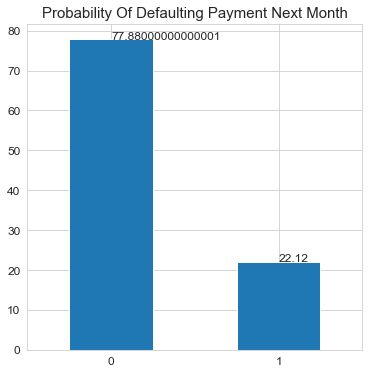

In [155]:
data_cnt = (data["default payment next month"].value_counts(normalize=True)*100)
data_cnt.plot.bar(figsize=(6,6))
plt.xticks(fontsize=12, rotation=0)
plt.yticks(fontsize=12)
plt.title("Probability Of Defaulting Payment Next Month", fontsize=15)
for x,y in zip([0,1],data_cnt):
    plt.text(x,y,y,fontsize=12)
plt.show()


In [10]:
# dividing features to categorical and numerical variable to do next steps easier.

var_cat=["SEX","EDUCATION","MARRIAGE","PAY_0","PAY_2","PAY_3","PAY_4","PAY_5","PAY_6"]
var_num=["LIMIT_BAL",'BILL_AMT1', 'BILL_AMT2','BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',"AGE"]

var_ind= ['default payment next month']

## 5. Distribution of Continuous Variables

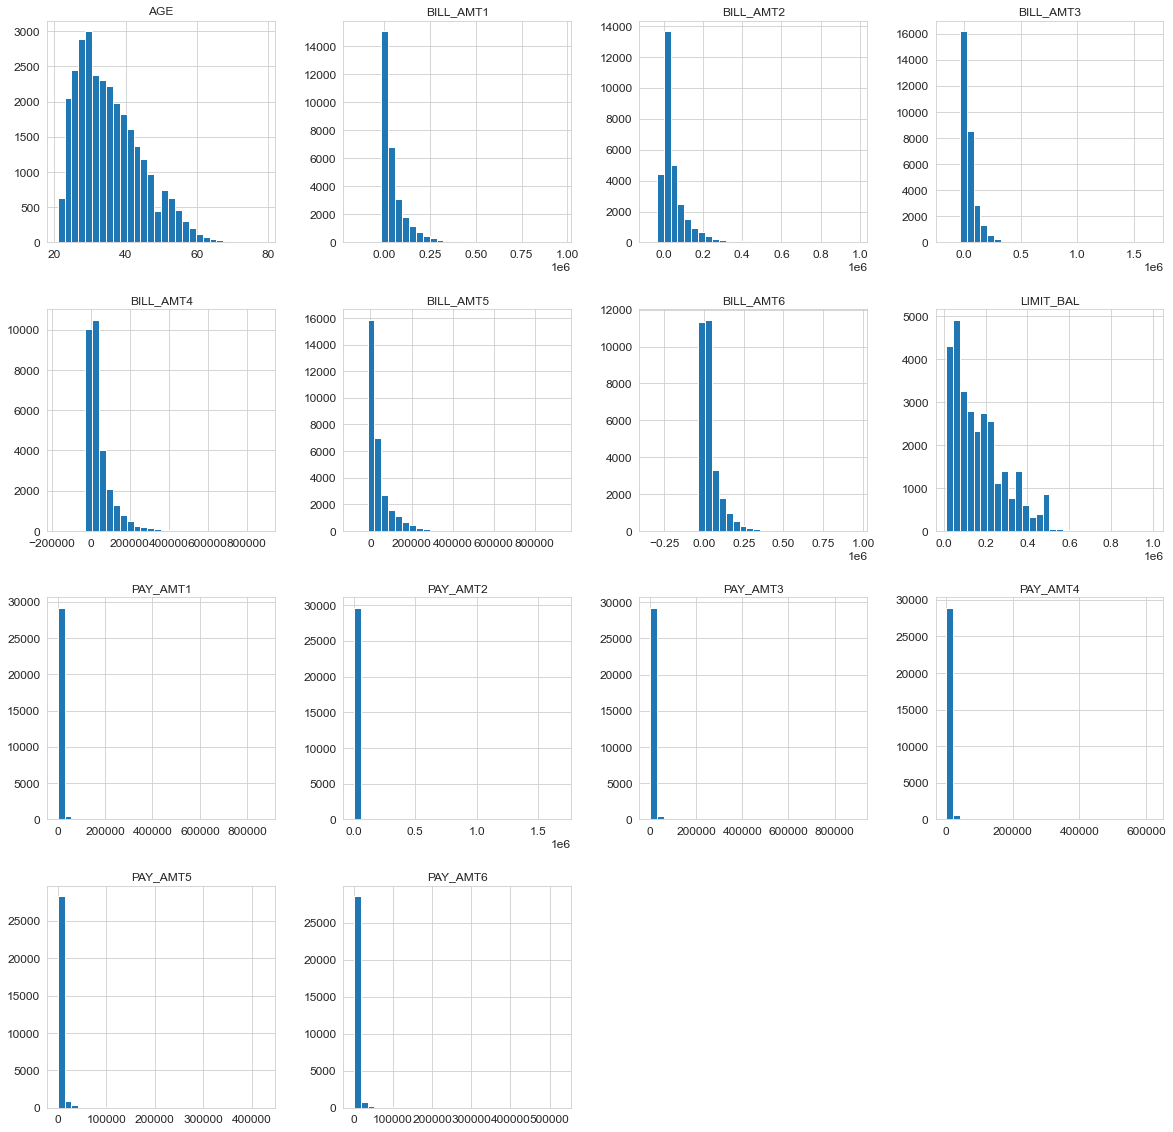

In [42]:
data.loc[:,var_num].hist(bins=30,figsize=(20,20))
plt.show()


The distributions of numerical features show most of them are not normally distributed. So I need to normalize them.

## 6. Normalization

As the first solution ,I try to standardize values by StandardScaler and MinMaxScalar,but no big difference is created.

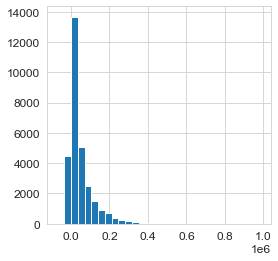

In [14]:
# Before Normalization

data.loc[:,"BILL_AMT2"].hist(bins=30,figsize=(4,4))
plt.show()     



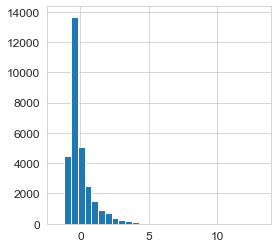

In [15]:
#After Normalization

 
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

tfmr = StandardScaler()
data["BILL_AMT2_scal"]=tfmr.fit_transform(data[['BILL_AMT2']])
data["BILL_AMT2_scal"].hist(bins=30,figsize=(4,4))                         
plt.show()


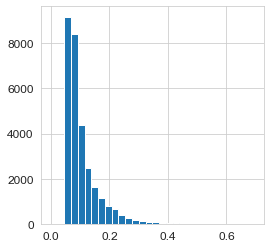

In [16]:
# After Normalization

#I tried to scale up by other function and after that get log to normalize but again nothing happened!

tfmr =  MinMaxScaler()
data["BILL_AMT2_min"]=tfmr.fit_transform(data[['BILL_AMT2']])
data["BILL_AMT2_min"].apply(np.log1p).dropna().hist(bins=30,figsize=(4,4))                         
plt.show()


## 7. Log Function

In the var_num distribution,it is right skewed. The ways to normalize this kind of data are: log,square root and cube root
I did the log method.

In [11]:
# Log function
data["AGE_log"]=data["AGE"].apply(np.log)
data["LIMIT_BAL_log"]=data["LIMIT_BAL"].apply(np.log)
data["BILL_AMT1_log"]=data["BILL_AMT1"].apply(np.log)
data["BILL_AMT2_log"]=data["BILL_AMT2"].apply(np.log)
data["BILL_AMT3_log"]=data["BILL_AMT3"].apply(np.log1p).dropna()
data["BILL_AMT4_log"]=data["BILL_AMT4"].apply(np.log1p)
data["BILL_AMT5_log"]=data["BILL_AMT5"].apply(np.log1p)
data["BILL_AMT6_log"]=data["BILL_AMT6"].apply(np.log)
data["PAY_AMT1_log"]=data["PAY_AMT1"].apply(np.log)
data["PAY_AMT2_log"]=data["PAY_AMT2"].apply(np.log)
data["PAY_AMT3_log"]=data["PAY_AMT3"].apply(np.log)
data["PAY_AMT4_log"]=data["PAY_AMT4"].apply(np.log)

data["PAY_AMT5_log"]=data["PAY_AMT5"].apply(np.log)
data["PAY_AMT6_log"]=data["PAY_AMT6"].apply(np.log)



I tried to plot logs ,but there are infinite values that avoid plotting.I tried to remove infinite values and get a plot to
see if they are more normalized.
As in log values for "AGE_log '' & "LIMIT_BAL_log ''the infinite values are zero. I normalize these two features by log method.
The plot is more likely normalized.

In [12]:
# There is no infinite values in log function of these variables.
print(np.isinf(data["AGE_log"]).values.sum())
print(np.isinf(data["LIMIT_BAL_log"]).values.sum())


0
0


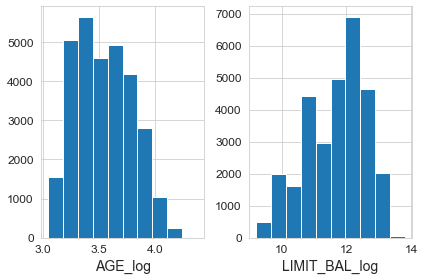

In [13]:
# The plot of log values showes more normalized.

plt.subplot(1,2,1)
plt.hist(data.loc[:,"AGE_log"],bins=10)


plt.xlabel('AGE_log')

plt.subplot(1,2,2)
plt.hist(data.loc[:,"LIMIT_BAL_log"],bins=10)
plt.xlabel('LIMIT_BAL_log')


plt.tight_layout()
plt.show()

Against these two features ,the other variables have some infinite values in their log function. 

In [14]:

c=["BILL_AMT1_log","BILL_AMT2_log","BILL_AMT3_log","BILL_AMT4_log","BILL_AMT5_log","BILL_AMT6_log","PAY_AMT1_log",
   "PAY_AMT2_log","PAY_AMT3_log","PAY_AMT4_log","PAY_AMT5_log","PAY_AMT6_log"]
for i in c:
    print(i,np.isinf(data[i]).values.sum())
  

BILL_AMT1_log 2008
BILL_AMT2_log 2506
BILL_AMT3_log 24
BILL_AMT4_log 25
BILL_AMT5_log 24
BILL_AMT6_log 4020
PAY_AMT1_log 5249
PAY_AMT2_log 5396
PAY_AMT3_log 5968
PAY_AMT4_log 6408
PAY_AMT5_log 6703
PAY_AMT6_log 7173


As number of infinite values in "BILL_AMT3_log'',"BILL_AMT4_log","BILL_AMT5_log" are low(24,25,24) ,I dropped these rows and normalize by log method. The result plot sounds more normalized. The infinite values in other features are very high and by dropping them I will miss a large part of data so I did not normalize them by log method.

In [15]:

# Before dropping we create a copy of data to compare result before and after dropping

data_nd=data.copy()

In [16]:
#Dropping rows that have infinite values.

data["BILL_AMT3_log"].replace([np.inf, -np.inf], np.nan, inplace=True)
data.dropna(inplace=True)
print(np.isinf(data["BILL_AMT3_log"]).values.sum())

data["BILL_AMT4_log"].replace([np.inf, -np.inf], np.nan, inplace=True)
data.dropna(inplace=True)
print(np.isinf(data["BILL_AMT4_log"]).values.sum())

data["BILL_AMT5_log"].replace([np.inf, -np.inf], np.nan, inplace=True)
data.dropna(inplace=True)
print(np.isinf(data["BILL_AMT5_log"]).values.sum())
print(data.shape)

0
0
0
(28070, 38)


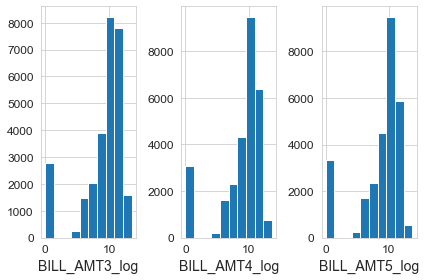

In [17]:
# Plot normalized features by using log function.

plt.subplot(1,3,1)
plt.hist(data.loc[:,"BILL_AMT3_log"],bins=10)
plt.xlabel('BILL_AMT3_log')

plt.subplot(1,3,2)
plt.hist(data.loc[:,"BILL_AMT4_log"],bins=10)
plt.xlabel('BILL_AMT4_log')


plt.subplot(1,3,3)
plt.hist(data.loc[:,"BILL_AMT5_log"],bins=10)
plt.xlabel('BILL_AMT5_log')

plt.tight_layout()
plt.show()

## Conclusion of Normalization
Trying to do normalization by two methods(MinMaxScalar and StandardScalar) could not help. With the log function for tree features AGE and LIMIT_BALL that there were not infinite values in their log we used this function for normalization. IN features BILL_AMT 3,4 and 5 we dropped some rows that have infinite values(because there were a few rows with this problem) and we used log function to normalize distribution of these variables.So in learning model we can use AGE_log,LIMIT_BAL_log,BILL_AMT3_log,BILL_AMT4_log and BILL_AMT5_log as original features.

## 8. Box plot & Violin plot of Continuous Variables

A boxplot is a standardized way of displaying the distribution of data based on a five number summary (“minimum”, first quartile (Q1), median, third quartile (Q3), and “maximum”). It can tell  about outliers.

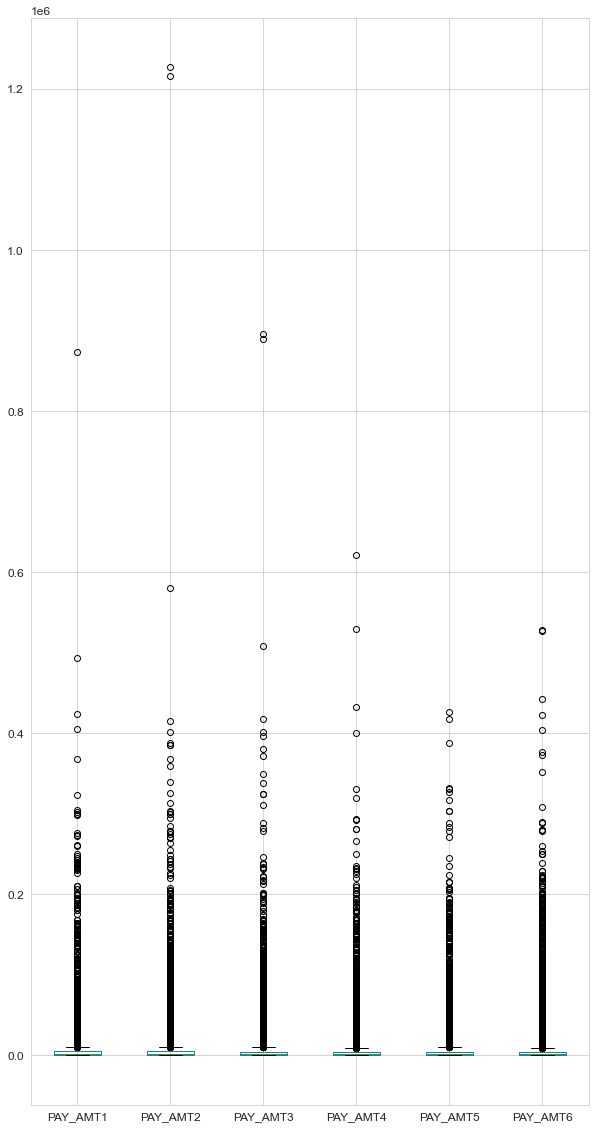

In [13]:
data.boxplot(column=['PAY_AMT1','PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6'],figsize=(10,20))
# The barplot showes the spread of data and the high number of outliers!

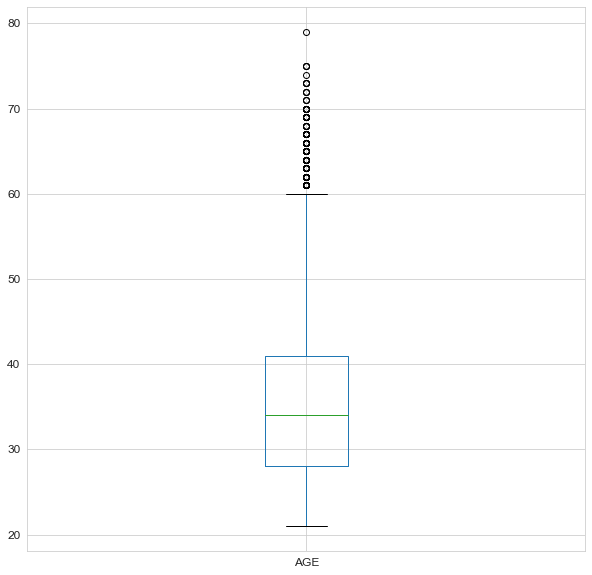

In [14]:
data.boxplot(column=["AGE"],figsize=(10,10))
#Relatively the number of outliers are lower than previous case.

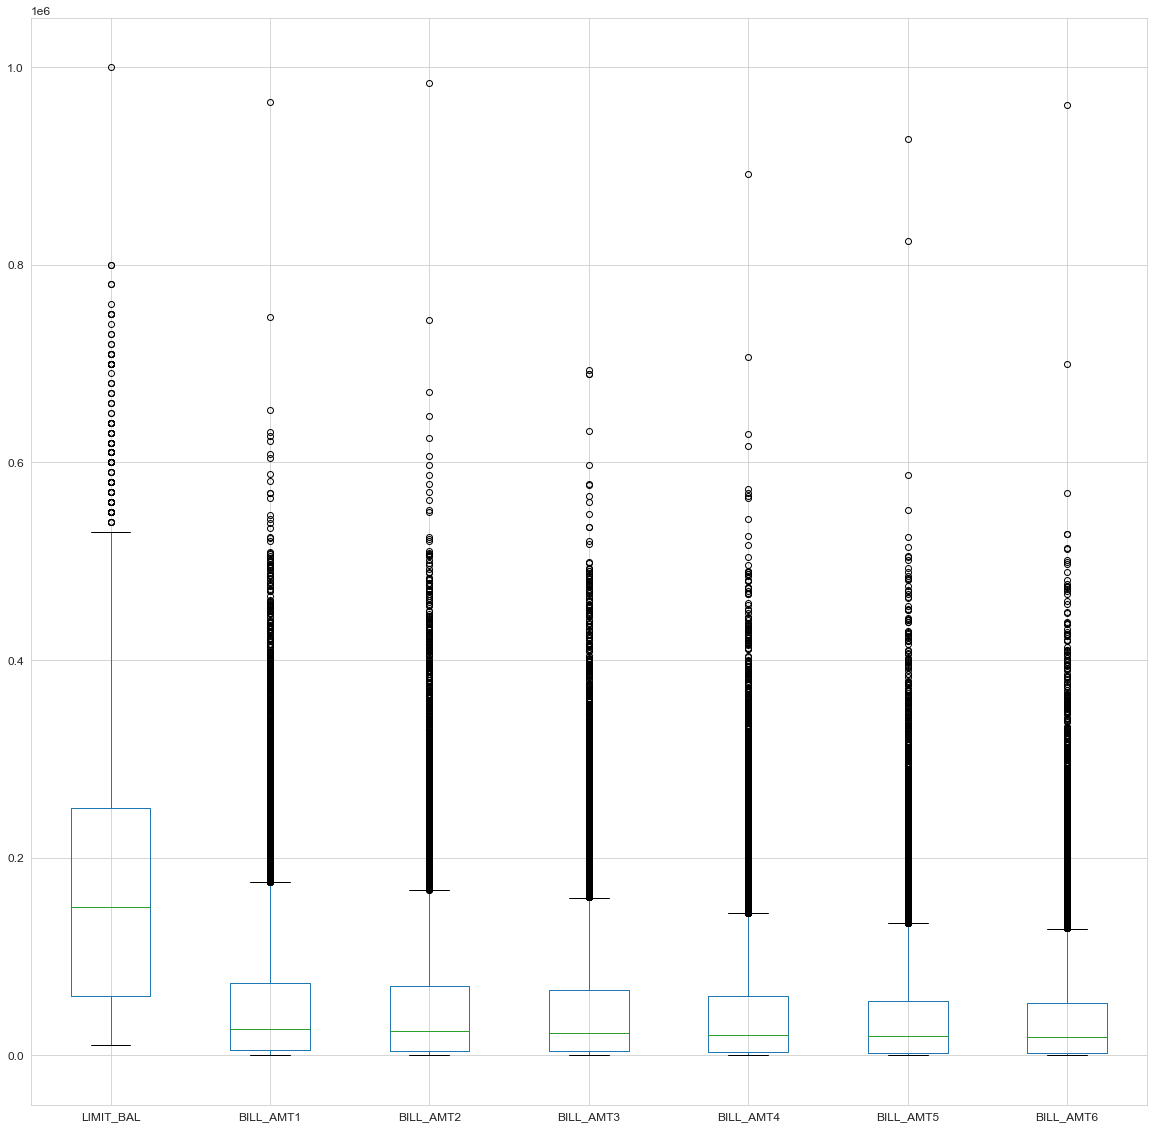

In [15]:
data[data["default payment next month"]==0].boxplot(column=["LIMIT_BAL",'BILL_AMT1', 'BILL_AMT2','BILL_AMT3', 
                                                            'BILL_AMT4', 'BILL_AMT5', "BILL_AMT6"],figsize=(20,20))
# Again high volume of outliers!

Among numerical values, it seems "AGE" and "LIMIT_BAL" have lower outliers.

Violin plot is another way to show the distribution of data in two classes.

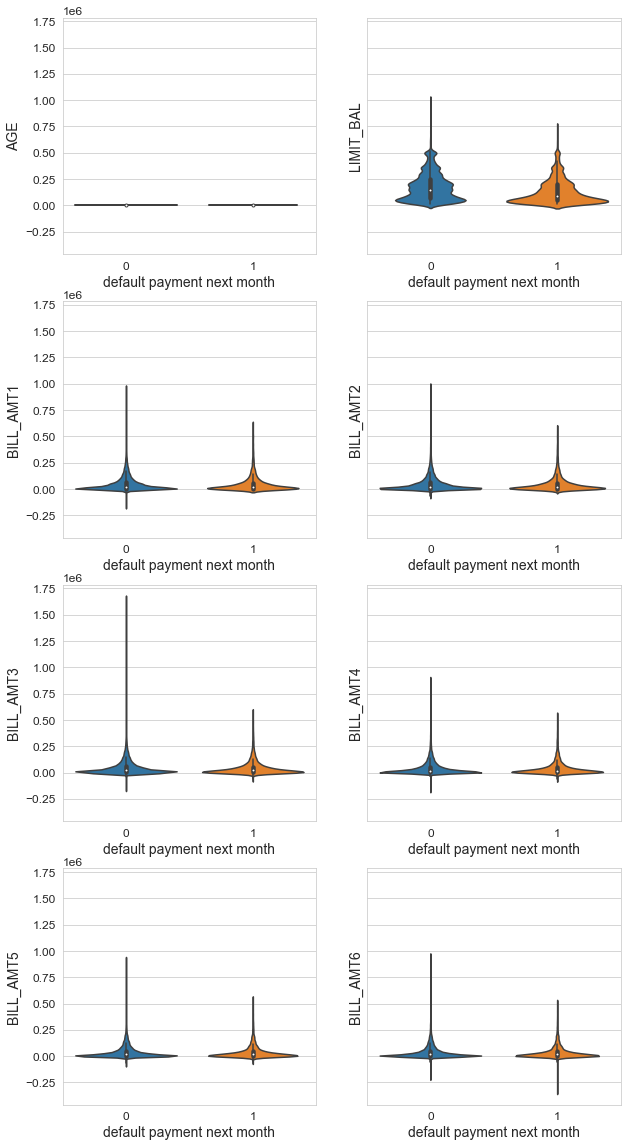

In [206]:
fig, axes = plt.subplots(4, 2, figsize=(10,20), sharey=True)

sns.violinplot(x="default payment next month", y="AGE", data=data,fidsize=(20,10),ax=axes[0,0])
sns.violinplot(x="default payment next month", y="LIMIT_BAL",data=data,ax=axes[0,1])
sns.violinplot(x="default payment next month", y="BILL_AMT1",data=data,ax=axes[1,0])
sns.violinplot(x="default payment next month", y="BILL_AMT2",data=data,ax=axes[1,1])
sns.violinplot(x="default payment next month", y="BILL_AMT3",data=data,ax=axes[2,0])
sns.violinplot(x="default payment next month", y="BILL_AMT4",data=data,ax=axes[2,1])
sns.violinplot(x="default payment next month", y="BILL_AMT5",data=data,ax=axes[3,0])
sns.violinplot(x="default payment next month", y="BILL_AMT6",data=data,ax=axes[3,1])

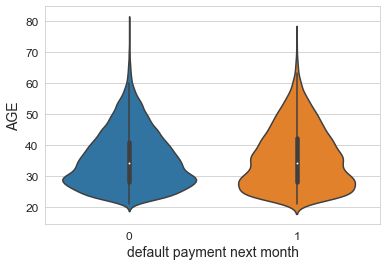

In [207]:
# For "AGE"in the above plot ,because the scale is very different in comparison to other features the plot is not shown
#clearly.
sns.violinplot(x="default payment next month", y="AGE", data=data,fidsize=(20,10))

Two features "AGE' and "LIMIT_BAL" show in high values we have more numbers of clients,however in other features the distribution around mean is more populated.

## 9. Visually Verification of Variables and Output

Now, I am trying to see how two class clients are distributed in each numerical variable.

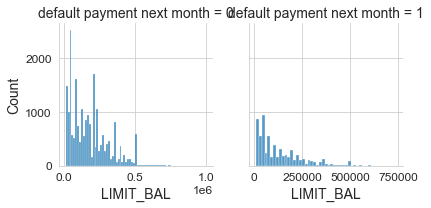

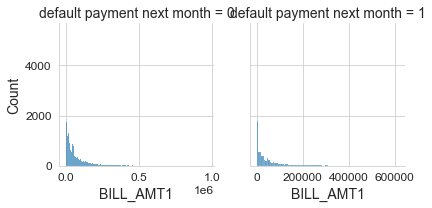

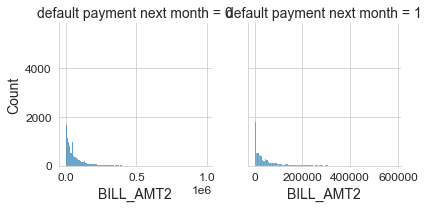

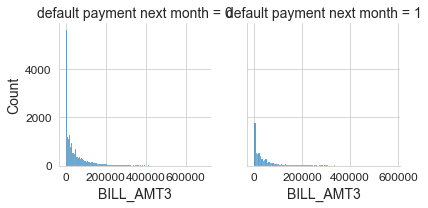

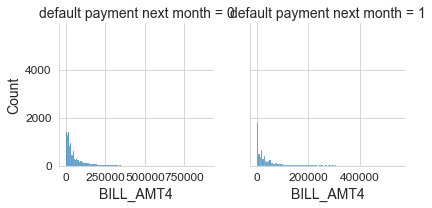

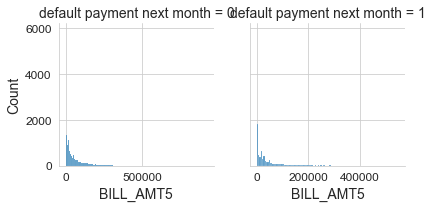

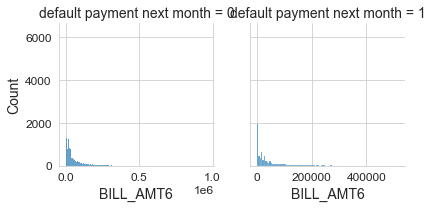

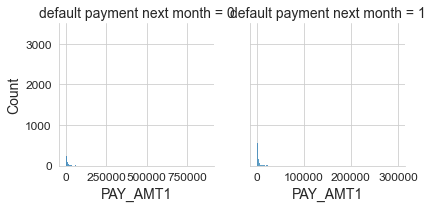

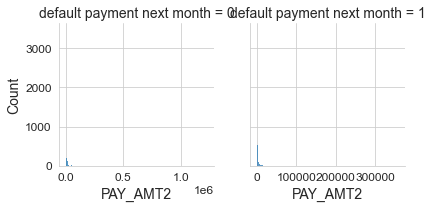

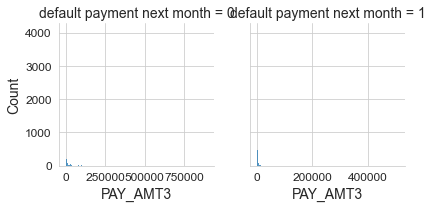

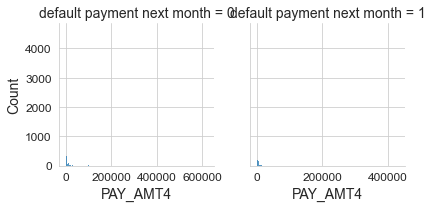

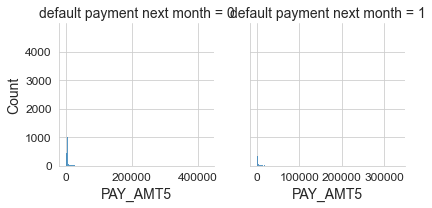

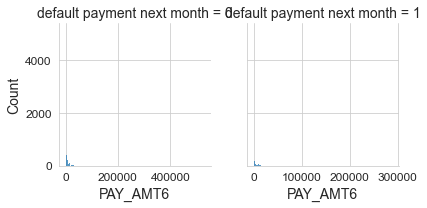

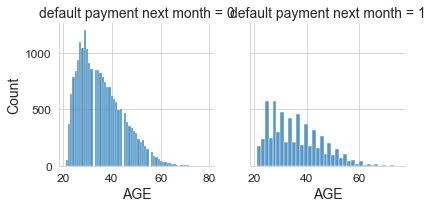

In [28]:
n = len(var_num)
target="default payment next month"
for i in range(n):
  g = sns.FacetGrid(data, col=target, sharex='col')
  g.map(sns.histplot, var_num[i])

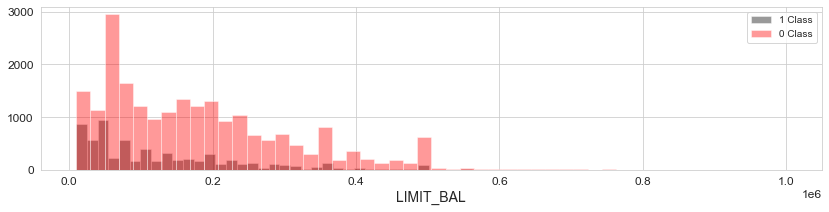

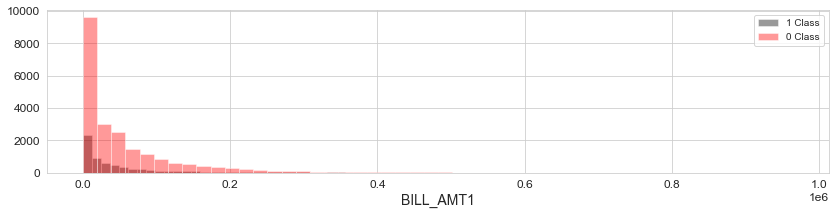

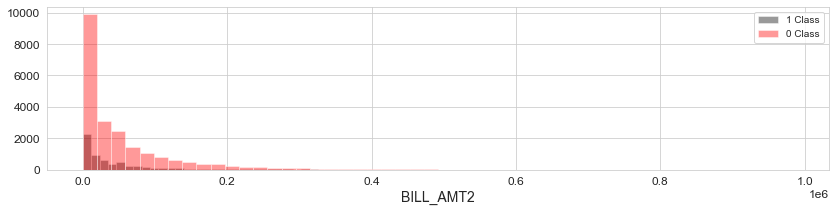

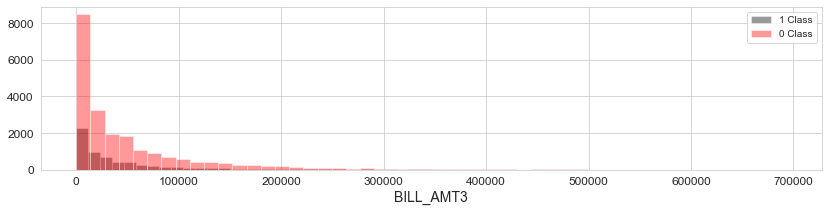

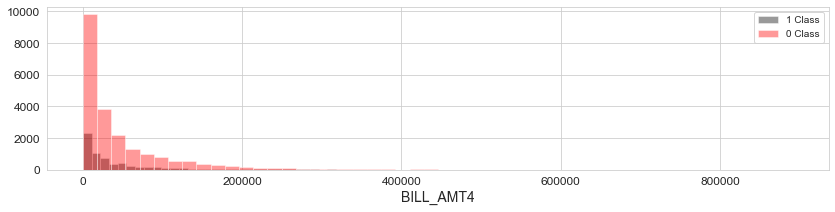

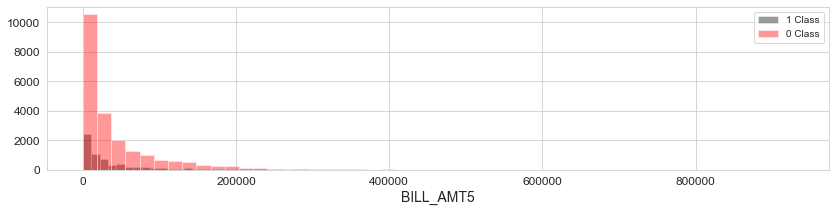

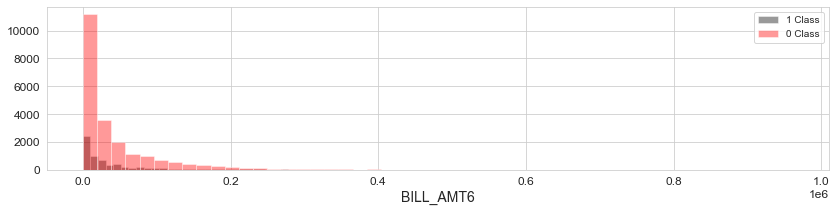

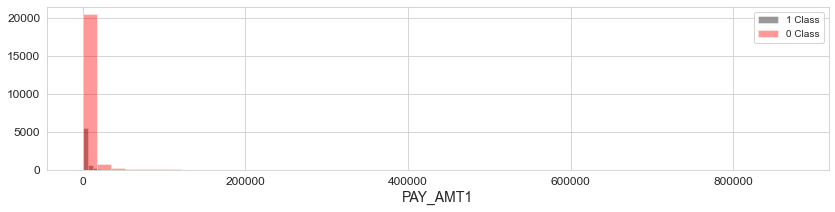

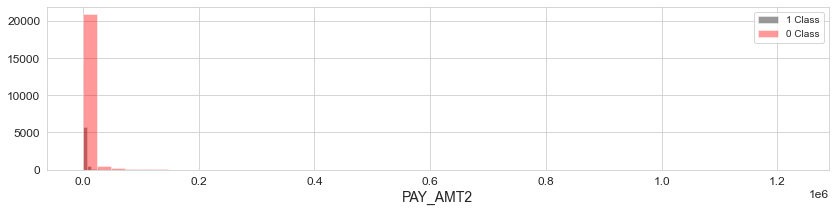

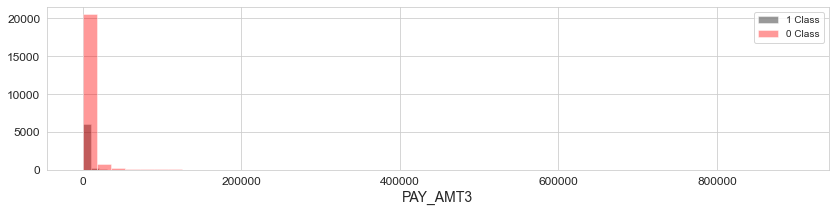

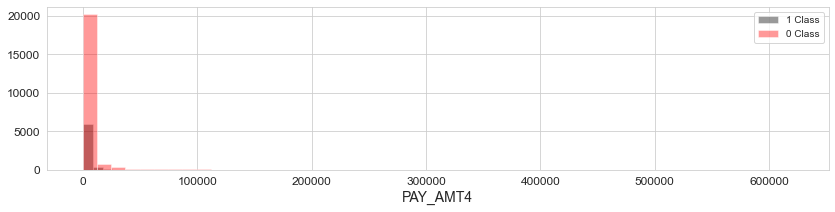

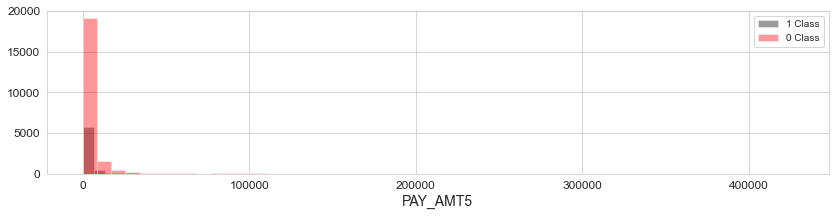

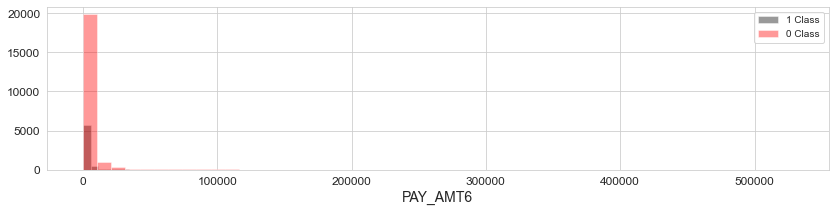

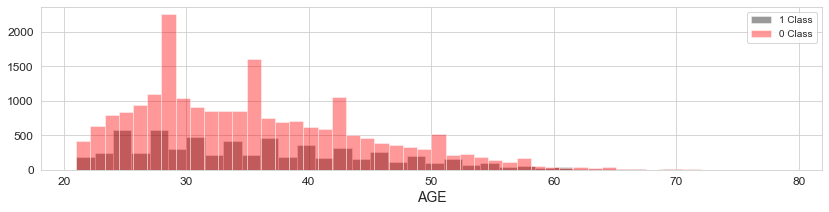

In [36]:
 for i in var_num:

    plt.figure(figsize=(14,3))
    sns.distplot(data[data["default payment next month"]== 1][i], color='black', kde=False, label='1 Class')
    sns.distplot(data[data["default payment next month"]== 0][i], color='red', kde=False, label='0 Class')
    plt.legend()
    plt.show()

As we know, if the proportion of two classes(output)in different values of a variable(here numerical) is different from other variables,that special feature is correlated with output and is a useful feature in modeling. As I see here ,it seems this proportion in high values is different from low values in AGE, LIMIT_BAL,BILL_AMNS and PAY_AMNTS.

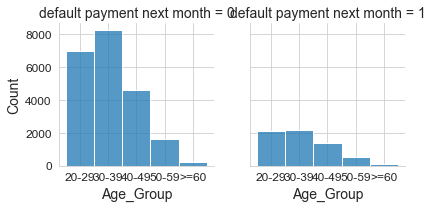

In [30]:
# I just divided ages into bins for more clear distribution.


bins = [20,30,40,50,60,81]
bin_labels = [ '20-29', '30-39', '40-49', '50-59','>=60']
data["Age_Group"] = pd.cut(data["AGE"], bins, right=False, labels = bin_labels) 


g = sns.FacetGrid(data, col="default payment next month", sharex='col')
g.map(sns.histplot, "Age_Group")

## 10. Pairplot

In pairplot we are going to verify the relation between different values to see if there is any trend or correlation.If two features are too correlated we should remove one of them to avoid multicollinearity effect.


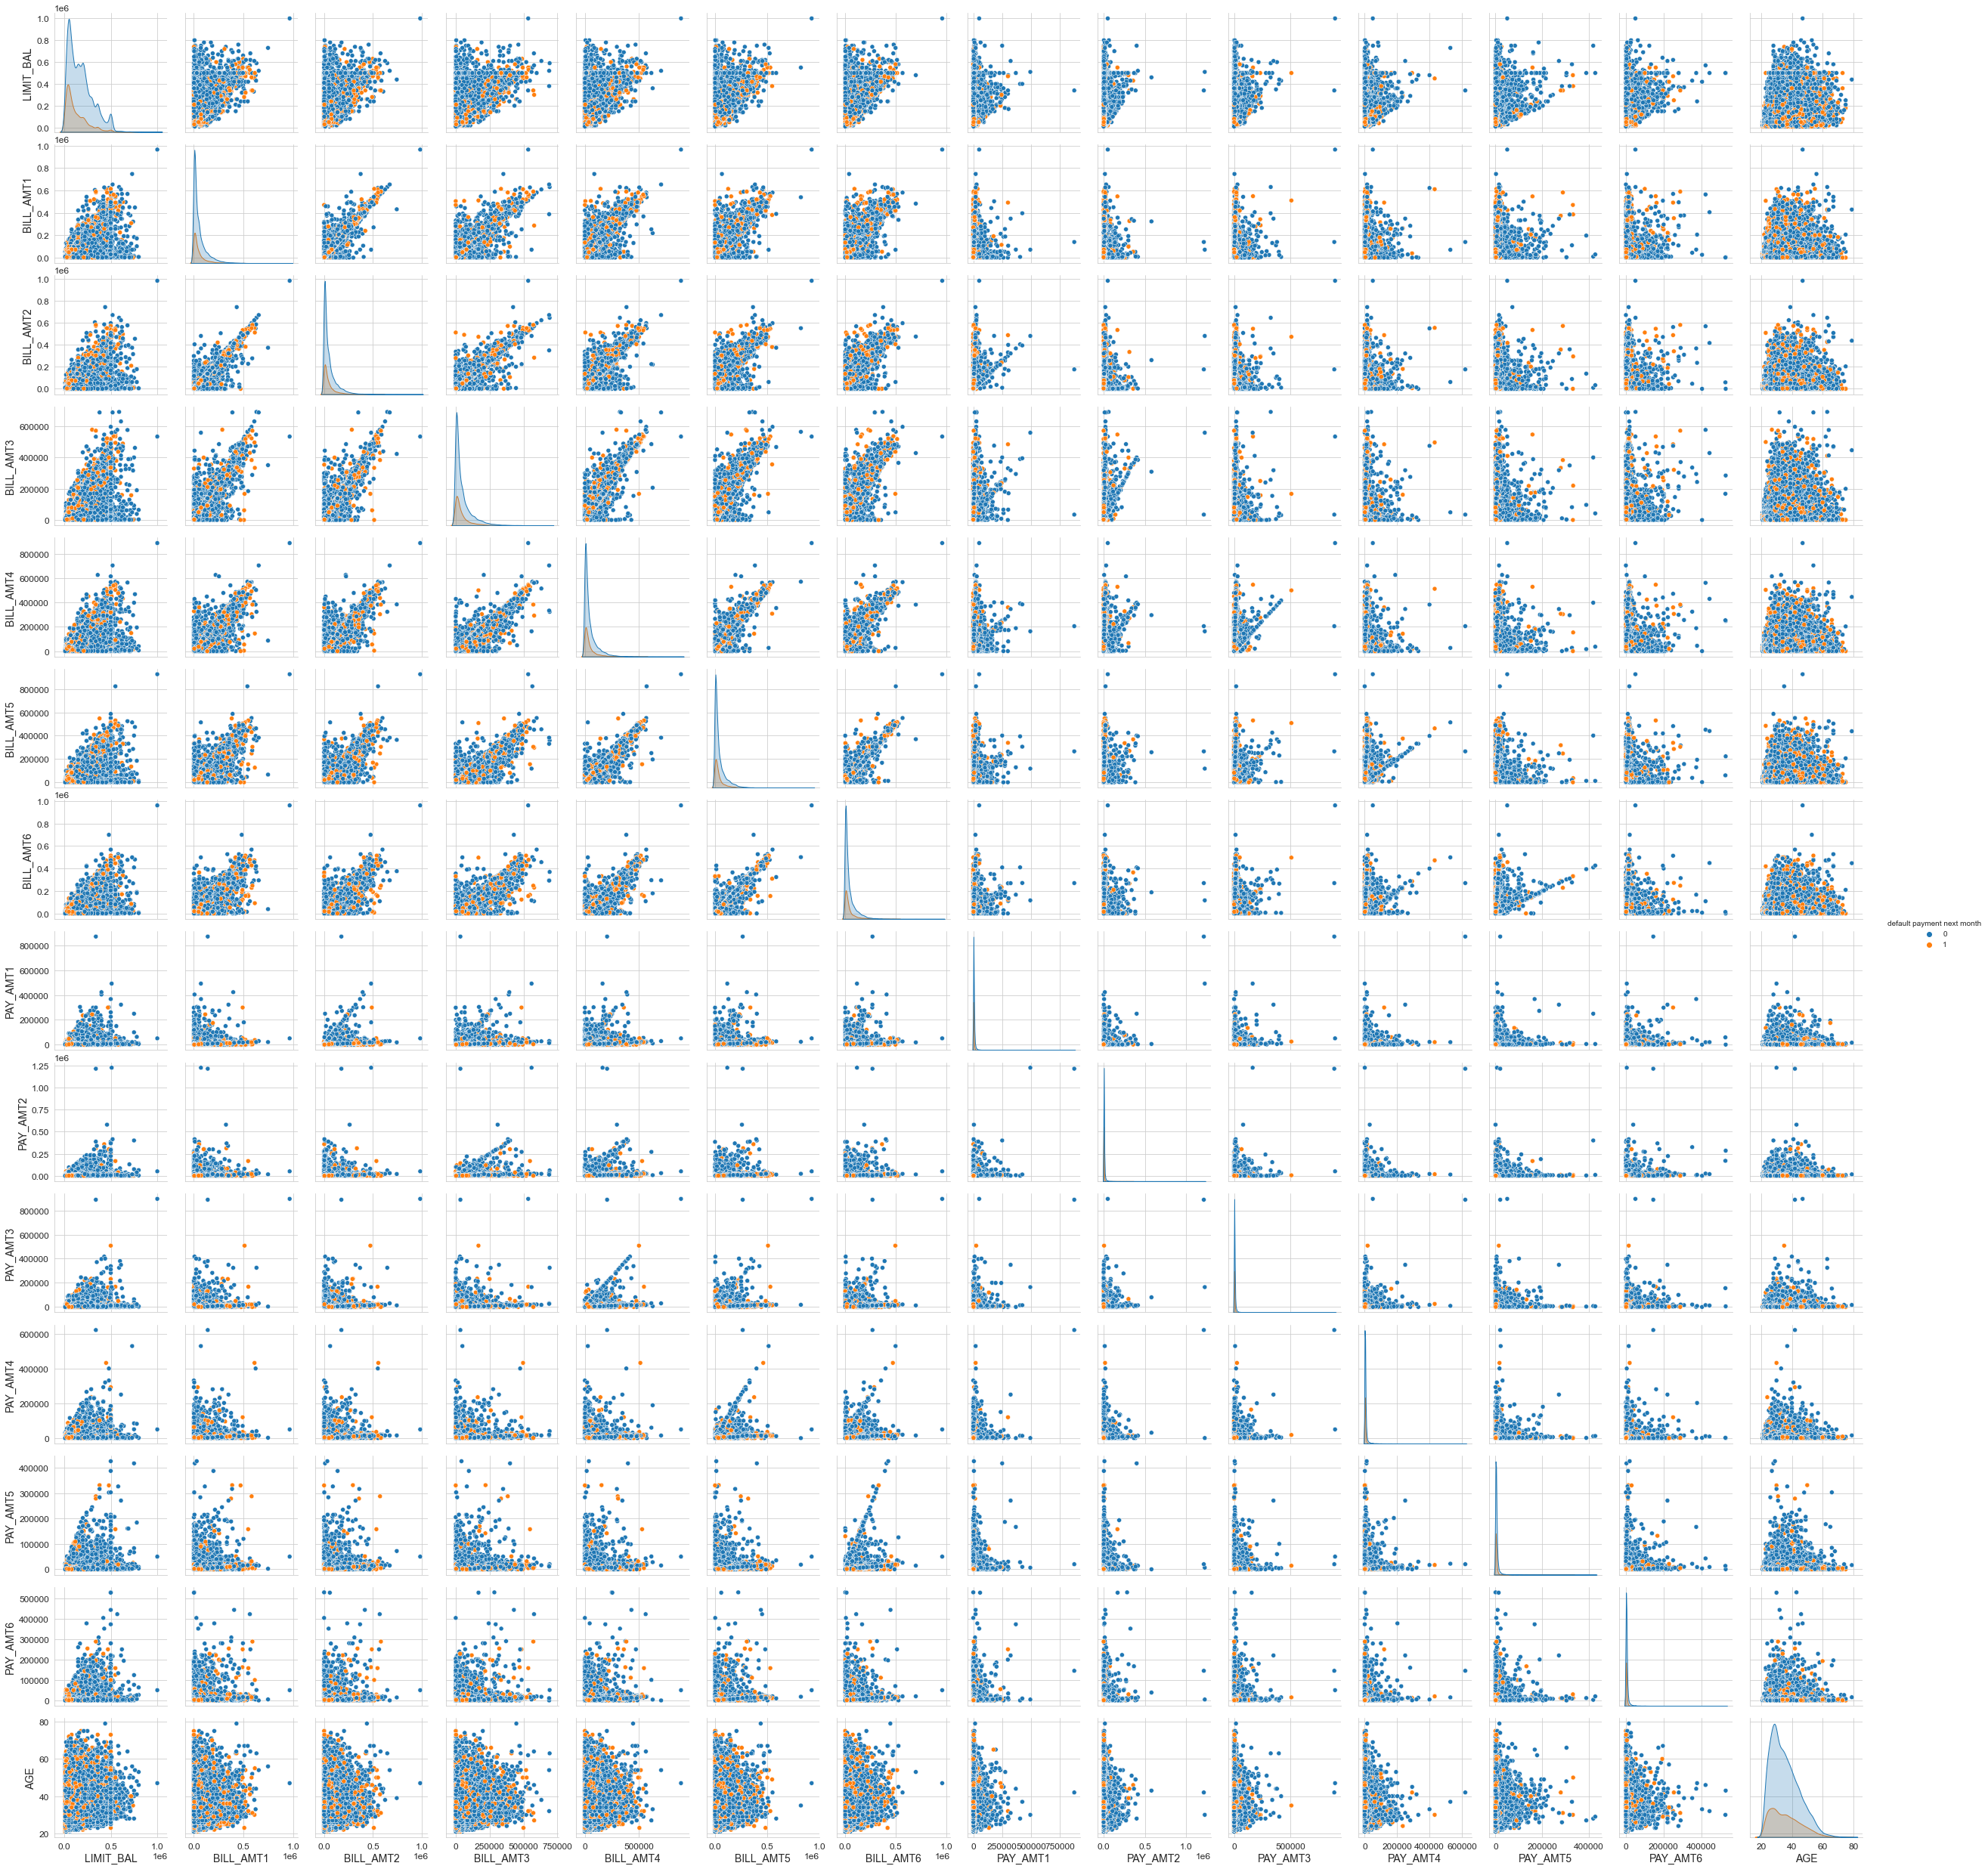

In [37]:
sns.pairplot(data.loc[:,var_num+var_ind],hue="default payment next month")
plt.show()



.We can say between BILL_AMT 1-6 kinds of correlation can be seen.
.Also there is some weak relation between some of the PAY_AMT values.
.For "AGE"we can not see any relation between AGE and other features.
.LIMIT_BAL does not show any correlation by other features.


## 11. Correlation Matrix

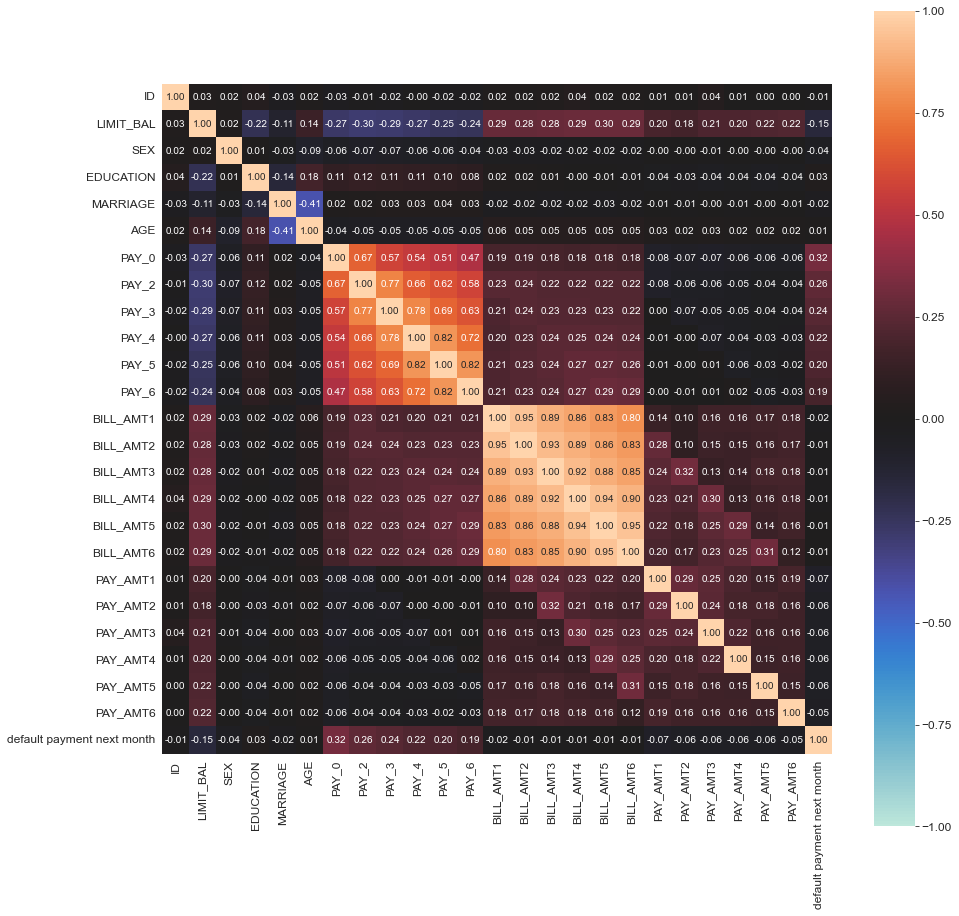

{'corr':                                   ID  LIMIT_BAL       SEX  EDUCATION  \
 ID                          1.000000   0.026179  0.018497   0.039177   
 LIMIT_BAL                   0.026179   1.000000  0.024755  -0.219161   
 SEX                         0.018497   0.024755  1.000000   0.014232   
 EDUCATION                   0.039177  -0.219161  0.014232   1.000000   
 MARRIAGE                   -0.029079  -0.108139 -0.031389  -0.143464   
 AGE                         0.018678   0.144713 -0.090874   0.175061   
 PAY_0                      -0.030575  -0.271214 -0.057643   0.105364   
 PAY_2                      -0.011215  -0.296382 -0.070771   0.121566   
 PAY_3                      -0.018494  -0.286123 -0.066096   0.114025   
 PAY_4                      -0.002735  -0.267460 -0.060173   0.108793   
 PAY_5                      -0.022199  -0.249411 -0.055064   0.097520   
 PAY_6                      -0.020270  -0.235195 -0.044008   0.082316   
 BILL_AMT1                   0.019389   0.2

In [25]:
from dython.nominal import associations
associations(data_o,figsize=(15,15))

According to the correlation matrix that shows the relation between features to numerical form, between output(default payment next month) and other features there is no high correlation. Additionally some of BILL_AMT and PAY_1-6 show high correlation that may cause multicollinearity. I try to keep in mind these features that can affect model performance. Plus to remove some features manually,Feature selection method or dimensionality reduction ways can help us to solve this problem.

## 12. Categorical Variables

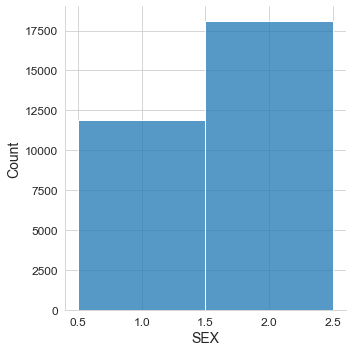

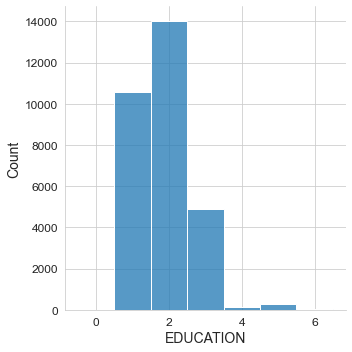

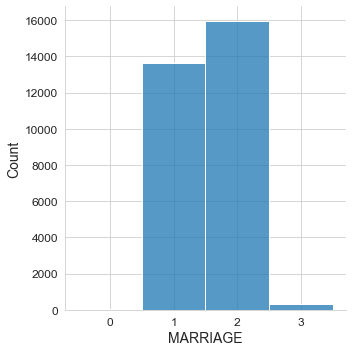

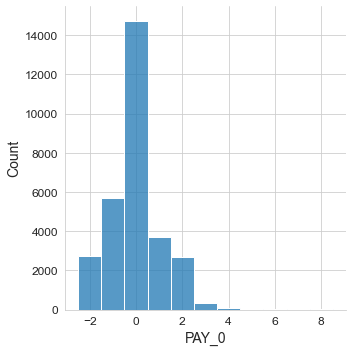

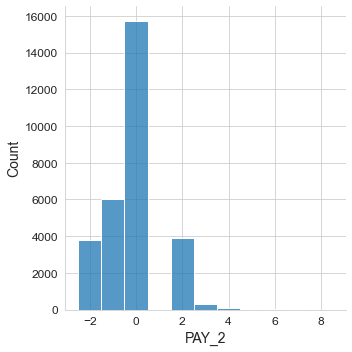

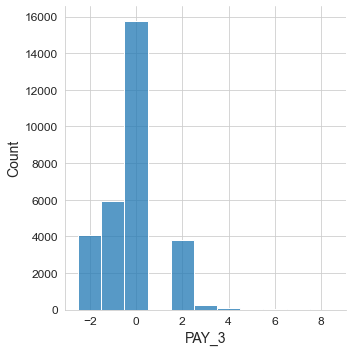

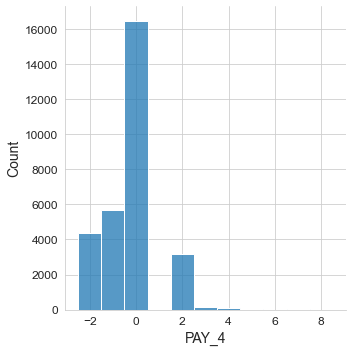

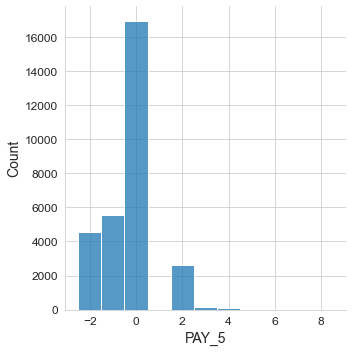

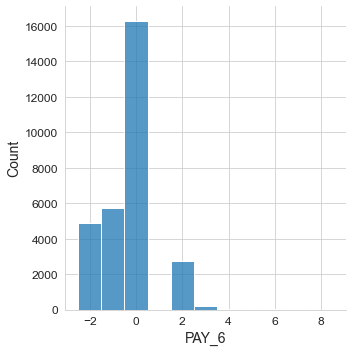

In [75]:

n = len(var_cat)

for i in range(n):
    sns.displot(data, x=var_cat[i], discrete=True)
   

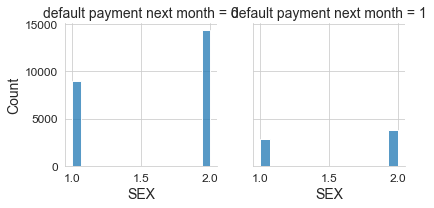

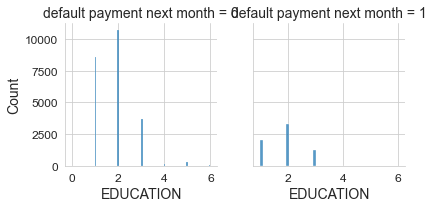

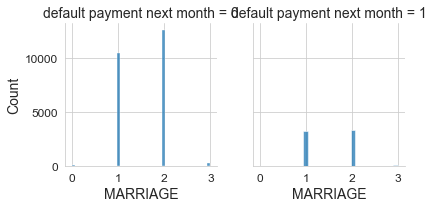

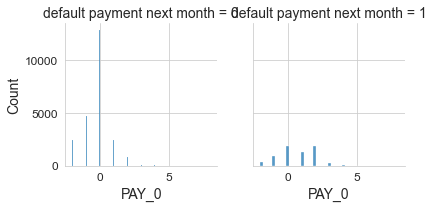

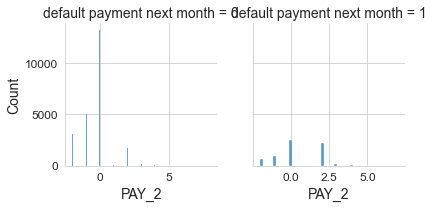

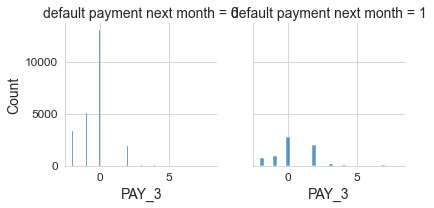

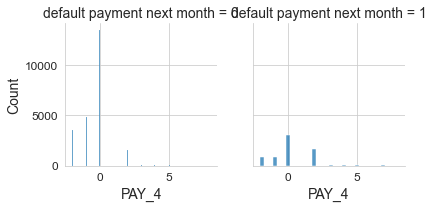

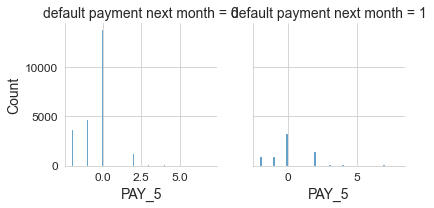

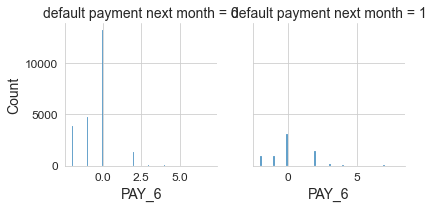

In [72]:
for i in range(n):
  g = sns.FacetGrid(data, col="default payment next month", sharex='col')
  g.map(sns.histplot, var_cat[i])

First I show the total distribution in different categories, and then divided them in two classes 1 and 0.It sees SEX, EDUCATION and MARRIAGE provide useful information as the proportional of different groups in two classes are not same. For example the ratio of married to single in to 1 and 0 classes are different so we can say MARRIAGE can be a useful feature.

## 13. Data Preprocessing

In [17]:
import scipy
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import FunctionTransformer
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression, RidgeClassifier
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import learning_curve
from sklearn.metrics import roc_curve
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform
from scipy.stats import randint
from sklearn.tree import DecisionTreeClassifier
from graphviz import Source
from sklearn import tree
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC


In [18]:
var_cat=["SEX","EDUCATION","MARRIAGE","PAY_0","PAY_2","PAY_3","PAY_4","PAY_5","PAY_6"]
var_num=["LIMIT_BAL_log",'BILL_AMT1', 'BILL_AMT2','BILL_AMT3_log', 'BILL_AMT4_log', 'BILL_AMT5_log', 'BILL_AMT6', 'PAY_AMT1'
         ,'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',"AGE_log"]
       
     
var_ind= ['default payment next month']

In [19]:
data[var_num+var_cat].shape

(28070, 23)

### Note:
As we have two set data( data: we did drop rowes because of normalization AND data_nd that we did not drop, I did all process for two type data to see dropping can affect the performance

## 14. Splitting dataset

Before learning model ,we need to devide dataset to two groups: train set and test set. We learn model on train set and get performance on test set:

In [20]:
# Splitting data
X=data[var_num+var_cat]
y=data[var_ind]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(22456, 23) (5614, 23) (22456, 1) (5614, 1)


In [21]:
# Splitting data_nd
var_cat=["SEX","EDUCATION","MARRIAGE","PAY_0","PAY_2","PAY_3","PAY_4","PAY_5","PAY_6"]
var_num_nd=["LIMIT_BAL_log",'BILL_AMT1', 'BILL_AMT2','BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1'
         ,'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',"AGE_log"]
          
var_ind= ['default payment next month']

X_nd=data_nd[var_num_nd+var_cat]
y_nd=data_nd[var_ind]
X_nd_train, X_nd_test, y_nd_train, y_nd_test = train_test_split(X_nd, y_nd, test_size=0.2, random_state=0)

print(X_nd_train.shape, X_nd_test.shape, y_nd_train.shape, y_nd_test.shape)

(24000, 23) (6000, 23) (24000, 1) (6000, 1)


For categorical values we need to encode data points. I did it by OneHotEncoder:

In [22]:


# Categorical -  one hot encode

cat_ohe_step = ('ohe', OneHotEncoder(sparse=False, handle_unknown='ignore'))
cat_steps = [cat_ohe_step]
cat_pipe = Pipeline(cat_steps)
cat_transformers = [('cat', cat_pipe, var_cat)]

For continuous values I need to scale up data points to get all the data in the same range. I did this one by MinMaxScaler:

In [23]:
# Numerical -  scale

num_scl_step = ('scl', MinMaxScaler())
num_steps = [ num_scl_step]
num_pipe = Pipeline(num_steps)
num_transformers = [('num', num_pipe, var_num)]

In [24]:
# Numerical -  scale data_nd

num_scl_step = ('scl', MinMaxScaler())
num_steps = [ num_scl_step]
num_pipe = Pipeline(num_steps)
num_transformers_nd = [('num', num_pipe, var_num_nd)]

## 15. Pipeline

In pipeline we apply all process on the columns:

In [25]:
# Pipeline

ct = ColumnTransformer(transformers=cat_transformers + num_transformers)
ct.fit(X_train)
X_train_tr = ct.transform(X_train)
X_test_tr = ct.transform(X_test)
print(X_train.shape)
print(X_train_tr.shape)
print(X_test.shape)
print(X_test_tr.shape)


     


(22456, 23)
(22456, 89)
(5614, 23)
(5614, 89)


In [26]:
# Pipeline data_nd


ct = ColumnTransformer(transformers=cat_transformers + num_transformers_nd)
ct.fit(X_nd_train)
X_nd_train_tr = ct.transform(X_nd_train)
X_nd_test_tr = ct.transform(X_nd_test)
print(X_nd_train.shape)
print(X_nd_train_tr.shape)
print(X_nd_test.shape)
print(X_nd_test_tr.shape)

(24000, 23)
(24000, 90)
(6000, 23)
(6000, 90)


## 16. Comparison RandomForest and KNeighbors Classifiers

.I want to try RFand KNN on my dataset. I did a CV at first to evaluate models. After I did Hyperparameter on both models and compared how the performance of these two models changed by ROC and confusion matrix. Finally I tried to select optimized ROC according to decreasing FPR.

## 17. Cross Validation

In [25]:
# CV before hyperparameter (RF,KNN)

rfc= RandomForestClassifier()
knn= KNeighborsClassifier()

cla=[rfc,knn]
for i in cla:
    scores = cross_val_score(i, X_train_tr, np.ravel(y_train), cv=5,scoring='roc_auc')
    print( "Score(data) of",i,":")
    print('   mean accuracy : ', round(scores.mean(),4), '% std: ', round(scores.var(), 4),'%')


Score(data) of RandomForestClassifier() :
   mean accuracy :  0.771 % std:  0.0001 %
Score(data) of KNeighborsClassifier() :
   mean accuracy :  0.7093 % std:  0.0001 %


In [26]:
# CV before hyperparameter data_nd(RF,KNN)

for i in cla:
    scores = cross_val_score(i, X_nd_train_tr, np.ravel(y_nd_train), cv=5,scoring='roc_auc')
    print( "Score (data_nd) of",i,":")
    print('   mean accuracy : ', round(scores.mean(),4), '% std: ', round(scores.var(), 4),'%')



Score (data_nd) of RandomForestClassifier() :
   mean accuracy :  0.7636 % std:  0.0 %
Score (data_nd) of KNeighborsClassifier() :
   mean accuracy :  0.7038 % std:  0.0 %


 # Note:
 It is clear that dropping the data does not have a negative effect, instead replacing log functions that help to normalize some features increase the scores.So we decided to continue with just dropped data.


## 18. Hyperparameter

We did hyperparameters for both models to improve models' performances.

In [23]:

#Hyperparameter (RF)

param_grid={ "criterion":['entropy',"gini"],"min_samples_leaf":list(range(1,9)),
            "n_estimators":[4,5,10,20,50 ]} 

#param_grid ={"n_estimators":[4,5,10,20,50 ]}
clf=RandomForestClassifier()

grid_search = GridSearchCV(estimator=clf, param_grid=param_grid,scoring='roc_auc',cv=5)
                           
                           
grid_search.fit(X=X_train_tr, y=np.ravel(y_train)) 
print(grid_search.best_params_)
print("\n",grid_search.best_estimator_)

{'criterion': 'gini', 'min_samples_leaf': 7, 'n_estimators': 50}

 RandomForestClassifier(min_samples_leaf=7, n_estimators=50)


In [126]:
# Hyperparameter(KNN)

param_grid ={"n_neighbors":[3, 5, 10, 20 ]}
clf=KNeighborsClassifier()

grid_search = GridSearchCV(estimator=clf, param_grid=param_grid,scoring='roc_auc',cv=5)
                           
                           
grid_search.fit(X=X_train_tr, y=np.ravel(y_train))  
print(grid_search.best_params_)
print("\n",grid_search.best_estimator_)

{'n_neighbors': 20}

 KNeighborsClassifier(n_neighbors=20)


In [39]:
# CV after Hyperparameter

rfc= RandomForestClassifier(n_estimators=50,min_samples_leaf=7,criterion="gini")
knn= KNeighborsClassifier(n_neighbors=20)

cla=[rfc,knn]
for i in cla:
    scores = cross_val_score(i, X_train_tr, np.ravel(y_train), cv=5,scoring='roc_auc')
    print( "Score(data) of",i,":")
    print('   mean accuracy : ', round(scores.mean(),4), '% std: ', round(scores.var(), 4),'%')

Score(data) of RandomForestClassifier(min_samples_leaf=7, n_estimators=50) :
   mean accuracy :  0.786 % std:  0.0 %
Score(data) of KNeighborsClassifier(n_neighbors=20) :
   mean accuracy :  0.7529 % std:  0.0001 %


### Result:
As it is shown after Hyperparameter in KNN model the score improved from 0.7093 to 0.7529 and for RF from 0.7636 to 0.786.

## 19. Fitting Models and Scoring by ROC and Confusion Matrix

In this part I fit the models and verify scores by roc_auc scores and confusion matrix.Finally I tried to find an optimized threshold.

In [40]:
# Fitting the models

model_rf=RandomForestClassifier(n_estimators=50).fit(X_train_tr, np.ravel(y_train))
model_knn=KNeighborsClassifier(n_neighbors=20).fit(X_train_tr, np.ravel(y_train))


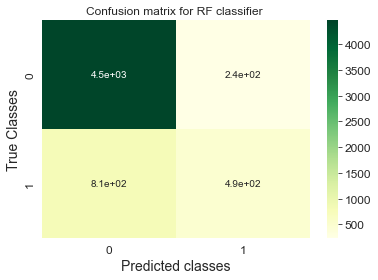

In [69]:
# Confution matrix (RF)

y_rf_pr1 = model_rf.predict(X_test_tr)
plt.title('Confusion matrix for RF classifier ')

sns.heatmap(confusion_matrix(y_test, y_rf_pr1), annot=True, cmap="YlGn")
plt.xlabel('Predicted classes')
plt.ylabel('True Classes')
plt.show()


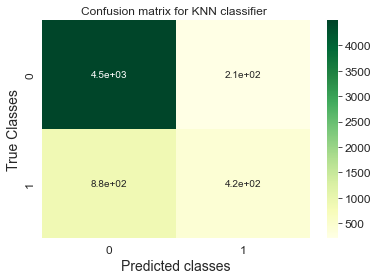

In [55]:
# Confusion matrix(KNN)

y_knn_pr1 = model_knn.predict(X_test_tr)

from sklearn.metrics import accuracy_score, confusion_matrix
plt.title('Confusion matrix for KNN classifier ')

sns.heatmap(confusion_matrix(y_test, y_knn_pr1), annot=True, cmap="YlGn")
plt.xlabel('Predicted classes')
plt.ylabel('True Classes')
plt.show()

In [43]:
# Scoring (knn)
y_knn_pr = model_knn.predict_proba(X_test_tr)
print("Accuracy of KNeighborsClassifier is: ",roc_auc_score(y_test,y_knn_pr[:,1]))
y_rf_pr = model_rf.predict_proba(X_test_tr)
print("Accuracy of RandomForest is: ",roc_auc_score(y_test,y_rf_pr[:,1]))



Accuracy of KNeighborsClassifier is:  0.7614086918610704
Accuracy of RandomForest is:  0.7611840697798907


### Result:
After fitting the model both models have approximately the same result.

## 20. Detecting Optimum Threshold
### ROC curve for Random Forest

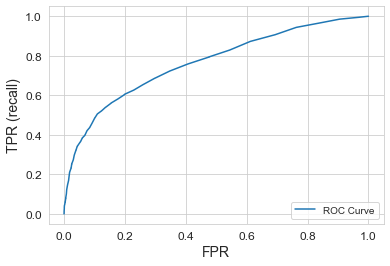

In [62]:
#ROC (RF)

model_rf=RandomForestClassifier(n_estimators=50).fit(X_train, np.ravel(y_train))
fpr, tpr, thresholds = roc_curve(np.ravel(y_test), model_rf.predict_proba(X_test)[:,1])

plt.plot(fpr, tpr, label="ROC Curve")
plt.xlabel("FPR")
plt.ylabel("TPR (recall)")

plt.legend(loc=4)

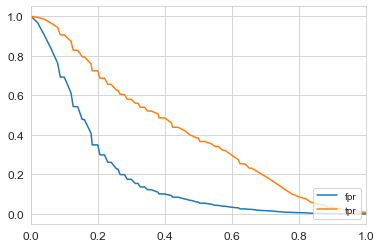

In [65]:
# Ploting TPR and FPR curve in different thresholds:

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.plot(thresholds,fpr, color='tab:blue',label="fpr")
ax.plot(thresholds,tpr, color='tab:orange',label="tpr")
ax.set_xlim([0,1])
plt.legend(loc=4);

### Selecting optimized thresholds:
As we know the most important factor in selecting a custom threshold is to think about the cost of FPR(false positive rate) and FNR(false negative rate).
Having background or being familiar with a business should be very helpful.Making decisions about whether increasing FP or FN has positive or negative effect on our business is not simple.
In our business(credit card) as all the decisions are made based on  the amount of the client's payment,I think if we have more false positives ,we will face some problems.
Imagine we count on paying some people who are not actually paying, so I try to get lower FP in moving the threshold.I chose threshold 0.6 to lower FP and not miss TP a lot.

In [82]:
# Applying selected threshold in output:

y_rf_pr = model_rf.predict_proba(X_test_tr)
y_rf_pr2=[1 if x >= 0.6 else 0 for x in y_rf_pr[:,1]]

from sklearn.metrics import f1_score
f1_score(y_test,y_rf_pr2)

0.4133406232914161

### Confusion mitrix after changing threshold (RF)

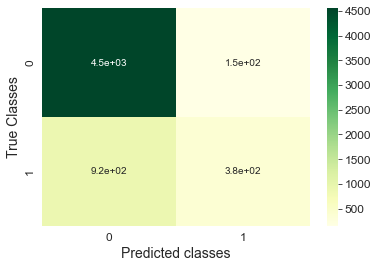

In [84]:

sns.heatmap(confusion_matrix(y_test, y_rf_pr2), annot=True, cmap="YlGn")
plt.xlabel('Predicted classes')
plt.ylabel('True Classes')
plt.show()


## ROC curve for KNeighbors

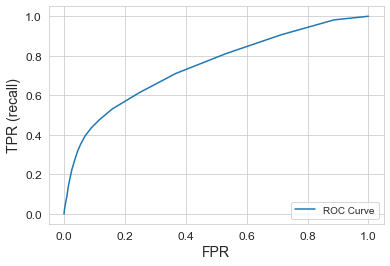

In [85]:
#ROC (KNN)

model_rf=KNeighborsClassifier(n_neighbors=20).fit(X_train_tr, np.ravel(y_train))
fpr, tpr, thresholds = roc_curve(np.ravel(y_test), model_rf.predict_proba(X_test_tr)[:,1])

plt.plot(fpr, tpr, label="ROC Curve")
plt.xlabel("FPR")
plt.ylabel("TPR (recall)")

plt.legend(loc=4)


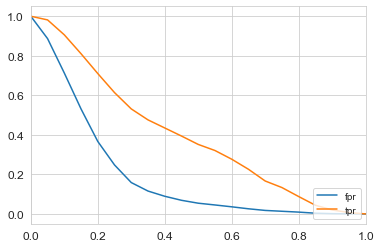

In [86]:
# Ploting TPR and FPR curve in different thresholds:

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.plot(thresholds,fpr, color='tab:blue',label="fpr")
ax.plot(thresholds,tpr, color='tab:orange',label="tpr")
ax.set_xlim([0,1])
plt.legend(loc=4);


Because of the same reasons that are mentioned for the RF model, here I choose 0.6 as the optimized threshold.

In [87]:
# Applying selected threshold in output:

y_knn_pr=model_rf.predict_proba(X_test_tr)
y_knn_pr2=[1 if x >= 0.6 else 0 for x in y_knn_pr[:,1]]

from sklearn.metrics import f1_score
f1_score(y_test,y_knn_pr2)

0.39342465753424655

### Confusion metrix after changing threshold  (KNN)

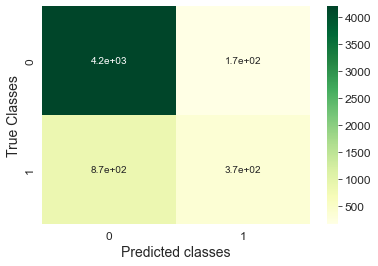

In [76]:

sns.heatmap(confusion_matrix(y_test, y_knn_pr2), annot=True, cmap="YlGn")
plt.xlabel('Predicted classes')
plt.ylabel('True Classes')
plt.show()


## Note:
Looking at confusionMatrix before and after tuning Threshold,shows the number of FP in both models has decreased.

## 21. Other Classifiers
## 22. Single Models

Here I tried some other single classifier to see if I can get better performance.For each model I did Hyperparameter at first and and after that I fit the models.Finally I compared the results.

## 23. Decision Tree


In [91]:
# Hyperparameter (DT)

distribution={"max_depth":list(range(2,50)), "criterion":['entropy',"gini"],"min_samples_leaf":randint(1, 9)} 
clf=DecisionTreeClassifier()
rs=RandomizedSearchCV(clf,distribution,random_state=0,cv=7)
search=rs.fit(X_train_tr,y_train)
search.best_params_

{'criterion': 'entropy', 'max_depth': 3, 'min_samples_leaf': 7}

## 24. Logistic Regression

In [98]:
# Hyperparameter (LR)

distribution= {"solver":['newton-cg', 'liblinear', 'sag', 'saga'],"penalty":['l2'],"C":[0.1,0.001,0.01, 1.0]}
clf= LogisticRegression()

grid_search = GridSearchCV(estimator=clf, param_grid=distribution,scoring='accuracy',cv=5)                        
                          
grid_search.fit(X=X_train_tr, y=np.ravel(y_train))  
print(grid_search.best_params_)
print("\n",grid_search.best_estimator_)


{'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear'}

 LogisticRegression(C=0.1, solver='liblinear')


## 25. SVC

In [27]:
# Hyperparameter

param_grid= {'C': [ 1, 20, 30],'gamma': [0.1, 0.01, 0.001],'kernel': ['rbf']}
clf=SVC()

grid_search = GridSearchCV(estimator=clf, param_grid=param_grid,scoring='accuracy',cv=5)
                          
grid_search.fit(X=X_train_tr, y=np.ravel(y_train)) 
print(grid_search.best_params_)
print("\n",grid_search.best_estimator_)
 

{'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}

 SVC(C=1, gamma=0.1)


## 26. Fitting and Comparison Single Classifiers

In [31]:

knn= KNeighborsClassifier(n_neighbors=20)
dt=DecisionTreeClassifier(criterion="entropy",max_depth=3,min_samples_leaf=7)
lr=LogisticRegression(C=0.1,penalty="l2",solver="liblinear")
svc=SVC(C=1,gamma=0.1,kernel="rbf")

cla=[knn,dt,lr,svc]
for i in cla:
    y_pr = i.fit(X_train_tr, y=np.ravel(y_train)).predict(X_test_tr)
    print("Accuracy of" ,i,  "is: ",accuracy_score(y_test,y_pr))
    

Accuracy of KNeighborsClassifier(n_neighbors=20) is:  0.8163519771998575
Accuracy of DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_leaf=7) is:  0.8206270039187745
Accuracy of LogisticRegression(C=0.1, solver='liblinear') is:  0.8195582472390452
Accuracy of SVC(C=1, gamma=0.1) is:  0.8220520128250801


## Result:
Between single models that I tried SVC has more accuracy (0.8221).


## 27. Ensemble Methods


There are some ensemble techniques that can improve the performance more than single models. They use different techniques. For example in Random forest there are some trees against Decision Tree that have just one tree.

## 28. Random Forest


In [40]:
distribution={"n_estimators":[5,10,20,50,70,100,150,200,250,300,350],"max_depth":list(range(2,20)), "criterion":['entropy',"gini"]}
              
clf=RandomForestClassifier()
rs=RandomizedSearchCV(clf,distribution,random_state=0)
search=rs.fit(X_train_tr,y=np.ravel(y_train))

search.best_params_

{'n_estimators': 150, 'max_depth': 13, 'criterion': 'gini'}

## 29. AdaBoost


In [37]:
# Hyperparameters

distribution={"n_estimators":[5,10,20,50,70,100,150,200,250,300,350],"learning_rate":[0.5,1,1.5,2], 
              "algorithm":['SAMME', 'SAMME.R']}
          
clf=AdaBoostClassifier(DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_leaf=7))
rs=RandomizedSearchCV(clf,distribution,random_state=0)
search=rs.fit(X_train_tr,y=np.ravel(y_train))

search.best_params_


{'n_estimators': 10, 'learning_rate': 0.5, 'algorithm': 'SAMME.R'}

## 30. Extra Trees 


In [38]:


distribution={"n_estimators":[5,10,20,50,70,100,150,200,250,300,350],"max_depth":list(range(2,20)), "criterion":['entropy',"gini"]}
          
clf=ExtraTreesClassifier()
rs=RandomizedSearchCV(clf,distribution,random_state=0)
search=rs.fit(X_train_tr,y=np.ravel(y_train))

search.best_params_

{'n_estimators': 50, 'max_depth': 10, 'criterion': 'gini'}

## 31. GradientBoosted Trees 

In [39]:
# Hyperparameter of GradientBoostingClassifier


distribution={"n_estimators":[5,10,20,50,70,100,150,200,250,300,350],"max_depth":list(range(2,20)),"learning_rate":[0.5,1,1.5,2] }
          
clf=GradientBoostingClassifier()
rs=RandomizedSearchCV(clf,distribution,random_state=0)
search=rs.fit(X_train_tr,y=np.ravel(y_train))

search.best_params_ 

{'n_estimators': 50, 'max_depth': 3, 'learning_rate': 0.5}

## 32. Fitting and Comparison Ensemble Classifiers

In [33]:
rf_e= RandomForestClassifier(n_estimators= 150, max_depth= 13, criterion= 'gini')
ada=AdaBoostClassifier(DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_leaf=7),
                       n_estimators=10,algorithm="SAMME.R", learning_rate=0.5)
extra=ExtraTreesClassifier(n_estimators= 50, max_depth= 10, criterion= 'gini')
grad=GradientBoostingClassifier(n_estimators= 50, max_depth= 3, learning_rate= 0.5)

cla=[rf_e,ada,extra,grad]
for i in cla:
    y_pr = i.fit(X_train_tr,y=np.ravel(y_train)).predict(X_test_tr)
    print(f"Accuracy of {i}  is: ",accuracy_score(y_test,y_pr))

Accuracy of RandomForestClassifier(max_depth=13, n_estimators=150)  is:  0.8181332383327395
Accuracy of AdaBoostClassifier(base_estimator=DecisionTreeClassifier(criterion='entropy',
                                                         max_depth=3,
                                                         min_samples_leaf=7),
                   learning_rate=0.5, n_estimators=10)  is:  0.8195582472390452
Accuracy of ExtraTreesClassifier(max_depth=10, n_estimators=50)  is:  0.8197363733523334
Accuracy of GradientBoostingClassifier(learning_rate=0.5, n_estimators=50)  is:  0.8147488421802637


## Result:

Between ensemble models ExtraTrees classifier has more accuracy(0.8197) than SVC as a single model.

## 33. Dimensionality Reduction

In [44]:
from sklearn.decomposition import PCA
pca = PCA(n_components=0.95)
train_set_transformed = pca.fit_transform(X_train_tr)

test_set_transformed = pca.transform(X_test_tr)
print(train_set_transformed.shape)
print(test_set_transformed.shape)
print(X_train_tr.shape)
print(X_test_tr.shape)

(22456, 21)
(5614, 21)
(22456, 89)
(5614, 89)


## 34. Learning Single Models by PCA

In [37]:
knn= KNeighborsClassifier(n_neighbors=20)
dt=DecisionTreeClassifier(criterion="entropy",max_depth=3,min_samples_leaf=7)
lr=LogisticRegression(C=0.1,penalty="l2",solver="liblinear")
svc=SVC(C=1,gamma=0.1,kernel="rbf")

cla=[knn,dt,lr,svc]
for i in cla:
    y_pr = i.fit(train_set_transformed, y=np.ravel(y_train)).predict(test_set_transformed)
    print("Accuracy of" ,i,  "is: ",accuracy_score(y_test,y_pr))

Accuracy of KNeighborsClassifier(n_neighbors=20) is:  0.8138582116138225
Accuracy of DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_leaf=7) is:  0.8044175276095475
Accuracy of LogisticRegression(C=0.1, solver='liblinear') is:  0.8161738510865693
Accuracy of SVC(C=1, gamma=0.1) is:  0.8206270039187745


Dimensionally techniques help to reduce the features and simplify the model.However at the same time some information that may be important has been missed.In our cases PCA in single models has decreased the accuracy:
KNN: 0.8164 to 0.8138,
DT : 0.8206 to 08044,
LR : 0.8196 to 0.8162,
SVC: 0.8221 to 0.8206.

## 35. Learning Ensemble Models by PCA

In [38]:
rf_e= RandomForestClassifier(n_estimators= 150, max_depth= 13, criterion= 'gini')
ada=AdaBoostClassifier(DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_leaf=7),
                       n_estimators=10,algorithm="SAMME.R", learning_rate=0.5)
extra=ExtraTreesClassifier(n_estimators= 50, max_depth= 10, criterion= 'gini')
grad=GradientBoostingClassifier(n_estimators= 50, max_depth= 3, learning_rate= 0.5)

cla=[rf_e,ada,extra,grad]
for i in cla:
    y_pr = i.fit(train_set_transformed,y=np.ravel(y_train)).predict(test_set_transformed)
    print(f"Accuracy of {i}  is: ",accuracy_score(y_test,y_pr))

Accuracy of RandomForestClassifier(max_depth=13, n_estimators=150)  is:  0.8108300676879231
Accuracy of AdaBoostClassifier(base_estimator=DecisionTreeClassifier(criterion='entropy',
                                                         max_depth=3,
                                                         min_samples_leaf=7),
                   learning_rate=0.5, n_estimators=10)  is:  0.8147488421802637
Accuracy of ExtraTreesClassifier(max_depth=10, n_estimators=50)  is:  0.8159957249732811
Accuracy of GradientBoostingClassifier(learning_rate=0.5, n_estimators=50)  is:  0.8074456715354471


## Result:
In ensemble models ,using a PC decrease the accuracy score.
So it seems using a PC missed some important information and does not help in scoring.

## 36. Learning Curve

To verify a model is underfit or overfit , one way is to see how its learning curve looks like.

In [49]:
#Learning curve of RF model

train_sizes=np.linspace(0.1,1, 20)
train_sizes, train_scores, test_scores = learning_curve(RandomForestClassifier
                                                        (n_estimators=50,criterion="gini",max_depth=11),X_train_tr,
                                                        y=np.ravel(y_train),cv=5,n_jobs=1,train_sizes=train_sizes)

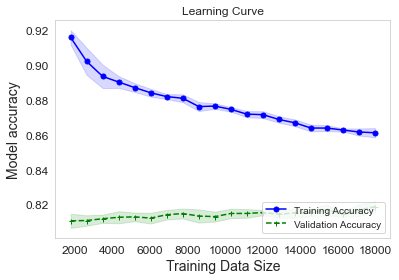

In [51]:
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.plot(train_sizes, train_mean, color='blue', marker='o', markersize=5, label='Training Accuracy')
plt.fill_between(train_sizes, train_mean + train_std, train_mean - train_std, alpha=0.15, color='blue')
plt.plot(train_sizes, test_mean, color='green', marker='+', markersize=5, linestyle='--', label='Validation Accuracy')
plt.fill_between(train_sizes, test_mean + test_std, test_mean - test_std, alpha=0.15, color='green')
plt.title('Learning Curve of RandomForest')
plt.xlabel('Training Data Size')
plt.ylabel('Model accuracy')
plt.grid()
plt.legend(loc='lower right')
plt.show()

## Result:
Because of the big gap between train score and test score, we can say there is overfitting here.
The Test score is lower than the train score .
Increasing the training data set does not help the performance of the model.

In [53]:
#Learning curve of SVC model

svc=SVC(C=1,gamma=0.1,kernel="rbf")
train_sizes, train_scores, test_scores = learning_curve(svc,X_train_tr,
                                                        y=np.ravel(y_train),cv=5,n_jobs=1,train_sizes=train_sizes)

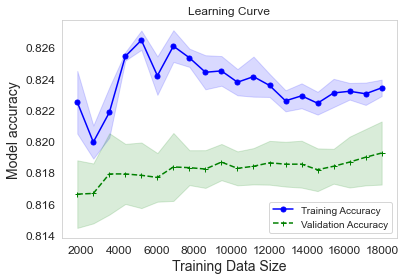

In [55]:
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)


plt.plot(train_sizes, train_mean, color='blue', marker='o', markersize=5, label='Training Accuracy')
plt.fill_between(train_sizes, train_mean + train_std, train_mean - train_std, alpha=0.15, color='blue')
plt.plot(train_sizes, test_mean, color='green', marker='+', markersize=5, linestyle='--', label='Validation Accuracy')
plt.fill_between(train_sizes, test_mean + test_std, test_mean - test_std, alpha=0.15, color='green')
plt.title('Learning Curve of SVC ')
plt.xlabel('Training Data Size')
plt.ylabel('Model accuracy')
plt.grid()
plt.legend(loc='lower right')
plt.show()

## Result:
The gap between train-set and test set is big ,so the model is overfitting.
Increasing training data size seems to help test score to increase,but steel train score is more than test score clearly.


In [28]:
#Learning curve of ExtraTrees model
train_sizes=np.linspace(0.1,1, 20)
extra=ExtraTreesClassifier(n_estimators= 50, max_depth= 10, criterion= 'gini')
train_sizes, train_scores, test_scores = learning_curve(extra,X_train_tr,
                                                        y=np.ravel(y_train),cv=5,n_jobs=1,train_sizes=train_sizes)

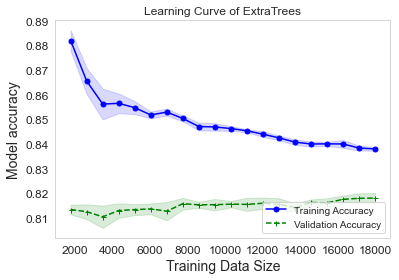

In [29]:
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)


plt.plot(train_sizes, train_mean, color='blue', marker='o', markersize=5, label='Training Accuracy')
plt.fill_between(train_sizes, train_mean + train_std, train_mean - train_std, alpha=0.15, color='blue')
plt.plot(train_sizes, test_mean, color='green', marker='+', markersize=5, linestyle='--', label='Validation Accuracy')
plt.fill_between(train_sizes, test_mean + test_std, test_mean - test_std, alpha=0.15, color='green')
plt.title('Learning Curve of ExtraTrees')
plt.xlabel('Training Data Size')
plt.ylabel('Model accuracy')
plt.grid()
plt.legend(loc='lower right')
plt.show()

## Result
Because of the big gap between train score and test score, we can say there is overfitting here.
Test score is lower than train score .
Increasing training data set does not help the performance of the model.

